We see that our dataset is mad of $n=892$ and $p=12$. These are its main features.


In [64]:
 load("mutuo.RData")
ls()
names(mutuo)
 mydata<-mutuo
mydata<-mydata[,c("cliente","durata", "storico", "eta","scopo")]

# verifica correttezza subset:
mydata[1:3,]

#verifica dimensione subset:
dim(mydata)

## AGGIUNGERE VARIABILE
#new.variable <- rep(1, length(mydata$y))

## substitute 0 to the ones corresponding to cars with mpg lower than the med
#new.variable [mydata$y < VALORE] <- 0
## create the dataset we need


#if you want to add a new variable into a mydata
#mydata<-data.frame(name_variable=new.variable,mydata[,c("nome colonna1","nome colonna 2", "nome colonna 3", ecc)])

[1] "X"                  "best.lambda"        "cv.lasso"          
 [4] "cv.ridge"           "est.probs"          "est.values"        
 [7] "id.zero"            "m.gam"              "m.gam2"            
[10] "m.lasso"            "m.lasso.min"        "m.pcr"             
[13] "m.ridge"            "m.ridge.min"        "model.mydata"      
[16] "model.mydata.lda"   "model.mydata.qda"   "model.mydata.train"
[19] "model.mydata2"      "model.mydata3"      "model.mydata4"     
[22] "model.mydata5"      "model.mydata6"      "mse"               
[25] "mutuo"              "mydata"             "n"                 
[28] "nonzero"            "pcr.pred"           "preds"             
[31] "preds.lda"          "preds.lda1"         "preds.qda"         
[34] "preds.test"         "probs.test"         "selection"         
[37] "sum"                "test.set"           "training.set"      
[40] "values.roc"         "x1.cv"              "x2"                
[43] "x2.cv"              "y"                  "y2"

[1] "durata"      "storico"     "scopo"       "ammontare"   "conto"      
 [6] "genere"      "proprieta"   "eta"         "casa"        "disoccupato"
[11] "persone"     "straniero"   "cliente"

cliente,durata,storico,eta,scopo
1,6,regolare,67,casa
0,48,non regolare,22,casa
1,12,regolare,49,istruzione


[1] 892   5

In [65]:
is.factor(mydata$scopo)
mydata$scopo<-as.factor(mydata$scopo)


[1] TRUE

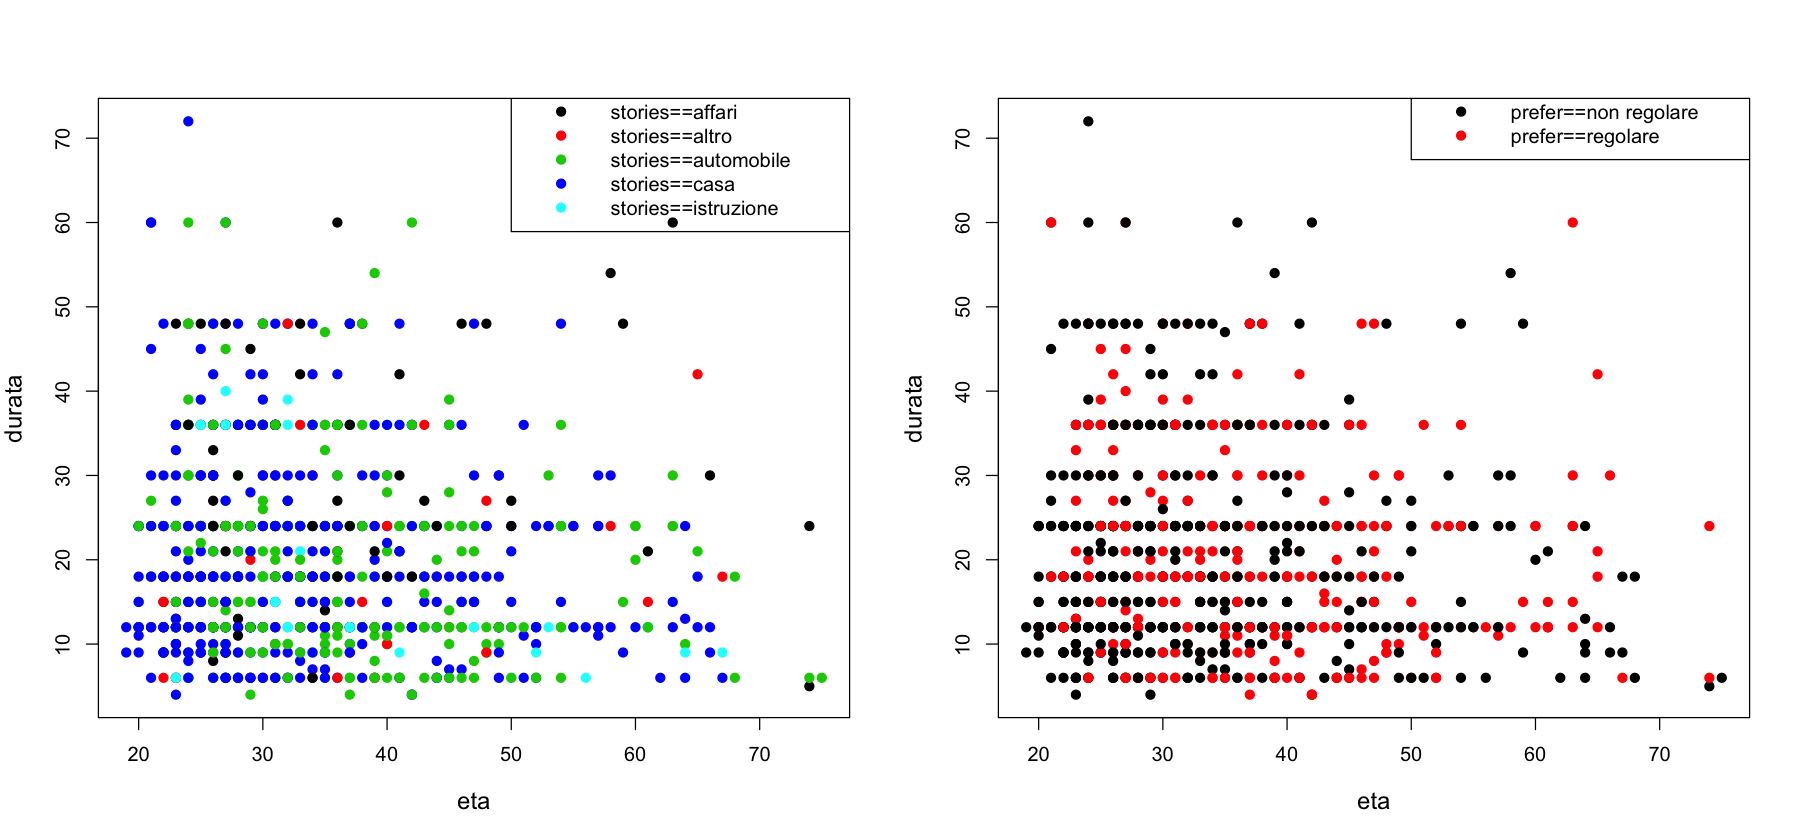

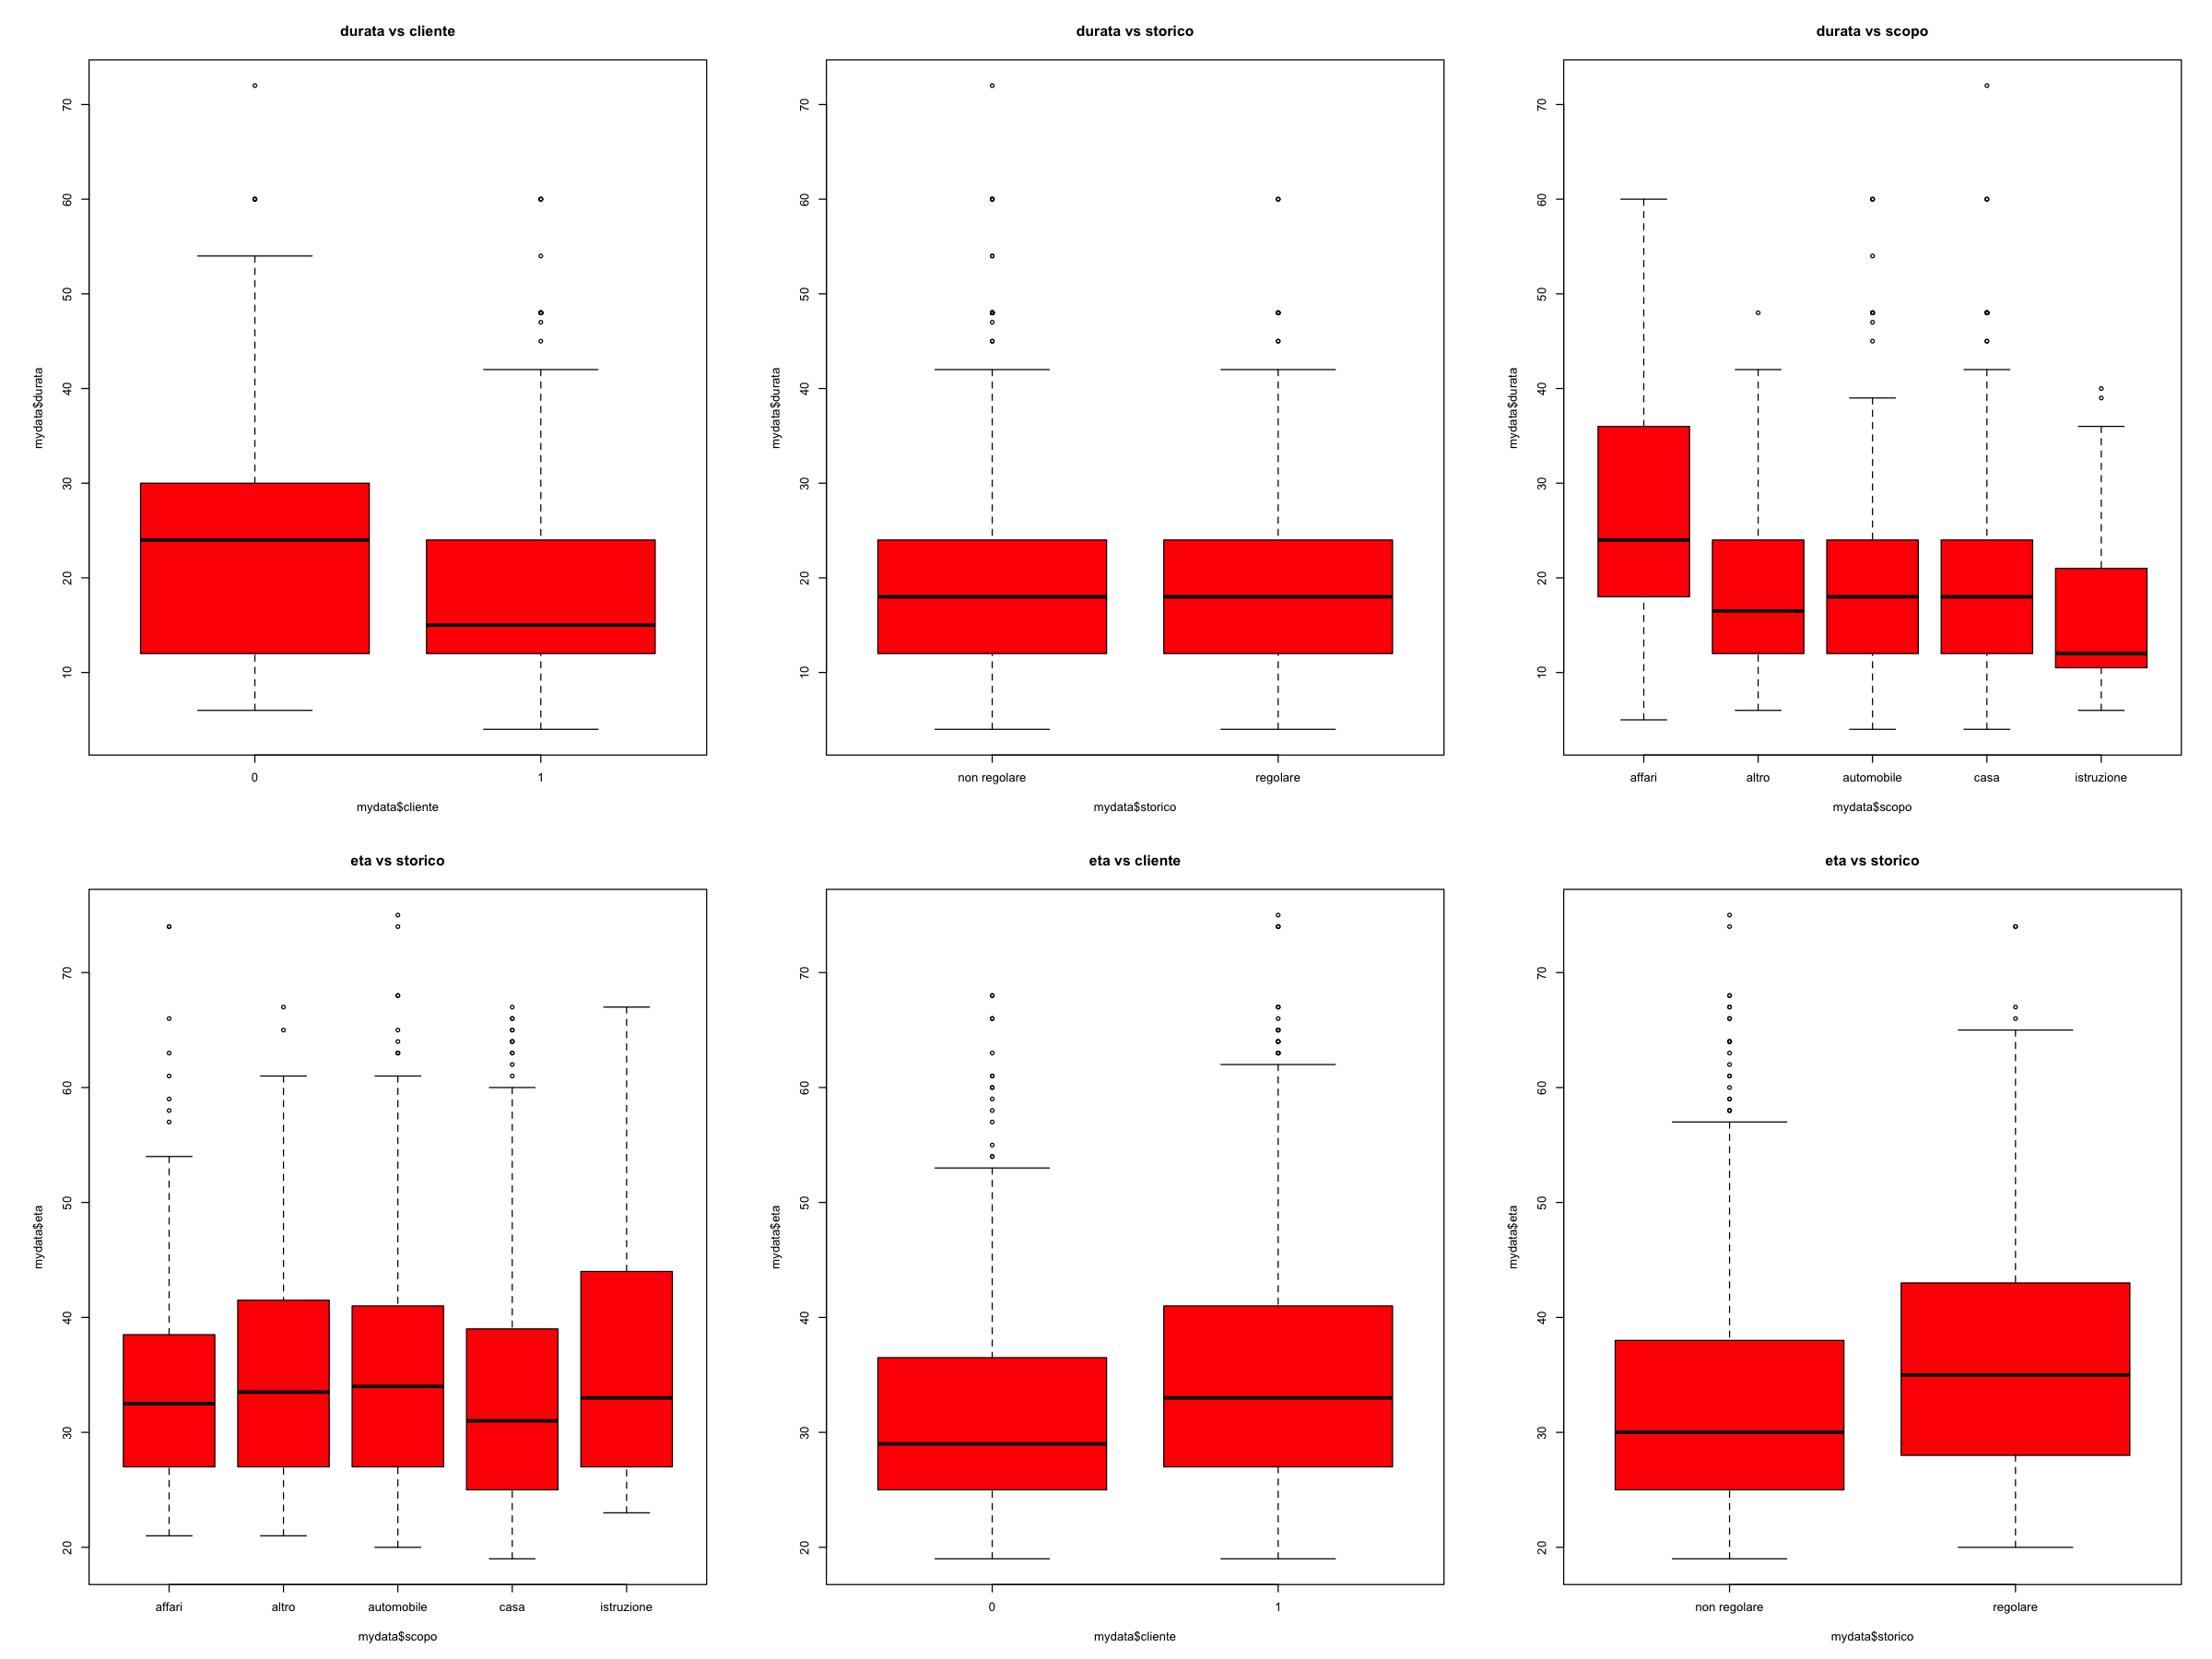

In [86]:
#plot boxplot diverse variabili :

## plot con tutte le variabili in funzione di y per vedere eventuale relazione

##plot per verificare eventuali interazioni, nel caso di variabili di tipo YES/NO o livelli o classe insomme
par(mfrow=c(1,2))
options(repr.plot.width = 15, repr.plot.height = 7)

plot(mydata$eta, mydata$durata, cex.lab=1.2,pch=19, xlab='eta', ylab='durata',col=mydata$scopo)
legend(x=50,y=76, col=c(1,2,3,4,5), pch=c(19,19),
        legend=c('stories==affari','stories==altro','stories==automobile','stories==casa','stories==istruzione'))


plot(mydata$eta, mydata$durata, pch=19,cex.lab=1.2, xlab='eta', ylab="durata",col=mydata$storico)
legend(x=50,y=76, col=c(1,2), pch=c(19,19),
        legend=c('prefer==non regolare','prefer==regolare'))

options(repr.plot.width = 20, repr.plot.height = 15)
    par(mar = c(5.1, 6.1, 4.1, 2.1))
    par(mfrow=c(2,3))

#plot variabile X contro prima variabile dichotomica
 boxplot(mydata$durata~ mydata$cliente, main="durata vs cliente",  col="red")

#plot variabile X contro la seconda variabile dichotomica
 boxplot(mydata$durata~ mydata$storico, main="durata vs storico", col="red")

#plot variabile X contro la seconda variabile dichotomica
 boxplot(mydata$durata~ mydata$scopo, col="red", main="durata vs scopo")

 boxplot(mydata$eta~ mydata$scopo, main="eta vs storico", col="red")
#plot variabile X contro prima variabile dichotomica
 boxplot(mydata$eta~ mydata$cliente, main="eta vs cliente",  col="red")

#plot variabile X contro la seconda variabile dichotomica
 boxplot(mydata$eta~ mydata$storico, main="eta vs storico", col="red")


##COMMENTARE RISULTATI

NOTA BENE: PLOTTARE BOXPLOT PER COVARIATA CONTINUA VS LE COVARIATE DISCRETE
PLOTTARE SCATTERPLOT PER COVARIATE CONTINUE TRA DI LORO CON I COLORI DIPENDENTI DAI DIVERSI LIVELLI DI VARIABILI DISCRETE


We see that a client is a good one he gives the money back in 15 months usually, while if he is bad around 25 motnhs (but in both case there are some outliers). There is no difference in case he has gave back the money in the past (with again some outliers). As concern the purpose, for affair purpose the time is higher than the other purpose, while for education is the smallst one ( there outliers for all except for affairs).
As concern the age, older clients are usually better than young, more regular. We also see that the  purposes are related to the same age more or less (except for house that has got younger age)

### LOGISTIC REGRESSION MODEL

In [67]:
# regression fit with all covariates and interactions of them
 model.mydata<- glm( cliente ~ durata*storico+durata*scopo+storico*scopo+eta*durata+eta*storico+eta*scopo, data=mydata, family=binomial)

# result of the regression fit
 summary (model.mydata)

model.mydata2 <- update(model.mydata, .~.-storico:scopo)
 summary (model.mydata2)

model.mydata3 <- update(model.mydata2, .~.
                        -storico:eta)
 summary (model.mydata3)

model.mydata4 <- update(model.mydata3, .~.-durata:storico)
 summary (model.mydata4)

model.mydata5 <- update(model.mydata4, .~.-durata:scopo)
 summary (model.mydata5)

model.mydata6 <- update(model.mydata5, .~.-durata:eta)
 summary (model.mydata6)


Call:
glm(formula = cliente ~ durata * storico + durata * scopo + storico * 
    scopo + eta * durata + eta * storico + eta * scopo, family = binomial, 
    data = mydata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6133  -1.1229   0.6063   0.8309   1.8634  

Coefficients:
                                  Estimate Std. Error z value Pr(>|z|)   
(Intercept)                      4.2303895  1.2857775   3.290  0.00100 **
durata                          -0.0934198  0.0346411  -2.697  0.00700 **
storicoregolare                  0.0377032  0.9947557   0.038  0.96977   
scopoaltro                      -2.9370748  1.7057601  -1.722  0.08510 . 
scopoautomobile                 -3.9298617  1.2227612  -3.214  0.00131 **
scopocasa                       -3.0229491  1.1656130  -2.593  0.00950 **
scopoistruzione                 -5.9328476  2.1039322  -2.820  0.00480 **
eta                             -0.0514155  0.0289684  -1.775  0.07592 . 
durata:storicoregolare          


Call:
glm(formula = cliente ~ durata + storico + scopo + eta + durata:storico + 
    durata:scopo + durata:eta + storico:eta + scopo:eta, family = binomial, 
    data = mydata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5359  -1.1323   0.6083   0.8204   1.8257  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)   
(Intercept)             4.0488306  1.2513733   3.236  0.00121 **
durata                 -0.0929348  0.0346352  -2.683  0.00729 **
storicoregolare         0.5335496  0.7739559   0.689  0.49058   
scopoaltro             -2.8007795  1.6945054  -1.653  0.09836 . 
scopoautomobile        -3.7727711  1.1976692  -3.150  0.00163 **
scopocasa              -2.8617097  1.1363280  -2.518  0.01179 * 
scopoistruzione        -5.9138791  2.0496038  -2.885  0.00391 **
eta                    -0.0506981  0.0289121  -1.754  0.07951 . 
durata:storicoregolare -0.0135418  0.0152547  -0.888  0.37469   
durata:scopoaltro       0.0079419  0.044078


Call:
glm(formula = cliente ~ durata + storico + scopo + eta + durata:storico + 
    durata:scopo + durata:eta + scopo:eta, family = binomial, 
    data = mydata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4116  -1.1339   0.6011   0.8241   1.8639  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)   
(Intercept)             3.8946774  1.2302348   3.166  0.00155 **
durata                 -0.0961923  0.0343700  -2.799  0.00513 **
storicoregolare         1.1234020  0.3870081   2.903  0.00370 **
scopoaltro             -2.7330220  1.6730235  -1.634  0.10235   
scopoautomobile        -3.6907869  1.1844673  -3.116  0.00183 **
scopocasa              -2.7672711  1.1235713  -2.463  0.01378 * 
scopoistruzione        -5.8444486  2.0510493  -2.849  0.00438 **
eta                    -0.0464460  0.0282995  -1.641  0.10075   
durata:storicoregolare -0.0151602  0.0151674  -1.000  0.31754   
durata:scopoaltro       0.0080168  0.0437960   0.183  0.8


Call:
glm(formula = cliente ~ durata + storico + scopo + eta + durata:scopo + 
    durata:eta + scopo:eta, family = binomial, data = mydata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3733  -1.1236   0.6055   0.8063   1.9326  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)             3.9256306  1.2317965   3.187  0.00144 ** 
durata                 -0.0971405  0.0346134  -2.806  0.00501 ** 
storicoregolare         0.7823332  0.1763026   4.437  9.1e-06 ***
scopoaltro             -2.7476884  1.6819127  -1.634  0.10233    
scopoautomobile        -3.7051591  1.1840828  -3.129  0.00175 ** 
scopocasa              -2.7625675  1.1222654  -2.462  0.01383 *  
scopoistruzione        -5.7575880  2.0416176  -2.820  0.00480 ** 
eta                    -0.0453062  0.0283416  -1.599  0.10991    
durata:scopoaltro       0.0095503  0.0439238   0.217  0.82787    
durata:scopoautomobile  0.0563243  0.0238042   2.366  0.01797 *  
dur


Call:
glm(formula = cliente ~ durata + storico + scopo + eta + durata:eta + 
    scopo:eta, family = binomial, data = mydata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3764  -1.0962   0.6141   0.8244   1.7996  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)          2.8045276  0.9808717   2.859  0.00425 ** 
durata              -0.0556594  0.0234038  -2.378  0.01740 *  
storicoregolare      0.7905275  0.1754730   4.505 6.63e-06 ***
scopoaltro          -2.0995654  1.4626466  -1.435  0.15116    
scopoautomobile     -2.1530212  0.9240988  -2.330  0.01981 *  
scopocasa           -1.9351437  0.8656425  -2.235  0.02538 *  
scopoistruzione     -3.9744846  1.5113214  -2.630  0.00854 ** 
eta                 -0.0394210  0.0272429  -1.447  0.14789    
durata:eta           0.0004863  0.0006805   0.715  0.47490    
scopoaltro:eta       0.0585961  0.0398908   1.469  0.14186    
scopoautomobile:eta  0.0604668  0.0253346   2.387  


Call:
glm(formula = cliente ~ durata + storico + scopo + eta + scopo:eta, 
    family = binomial, data = mydata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4136  -1.1227   0.6147   0.8324   1.7742  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          2.373317   0.771586   3.076   0.0021 ** 
durata              -0.039730   0.006883  -5.772 7.81e-09 ***
storicoregolare      0.788388   0.175493   4.492 7.04e-06 ***
scopoaltro          -2.008102   1.449885  -1.385   0.1661    
scopoautomobile     -2.025785   0.909253  -2.228   0.0259 *  
scopocasa           -1.815668   0.851563  -2.132   0.0330 *  
scopoistruzione     -3.743834   1.479266  -2.531   0.0114 *  
eta                 -0.026090   0.019880  -1.312   0.1894    
scopoaltro:eta       0.055996   0.039537   1.416   0.1567    
scopoautomobile:eta  0.056310   0.024797   2.271   0.0232 *  
scopocasa:eta        0.059216   0.023352   2.536   0.0112 *  
scopoistruzio

We start with a model with all covariates and all interactions, and we and with the following model using model selection. The selection was made based on P-value. There are some covariates for which the p-value is very high (scopoaltro) for example, but for hierarcy principle we cannot remove them. In table there is also the comparison between initial and final model

In [68]:
set.seed(111)
library(gam)
## CONSIDERA LE VARIABILI NON LINEARI
x1.cv = smooth.spline(x= mydata$eta, y=mydata$cliente, cv=TRUE)
x1.cv 
x2.cv = smooth.spline(x= mydata$scopo, y=mydata$cliente, cv=TRUE)
x2.cv 


## primo fit considerando le variabili splines smooth
m.gam <- gam(cliente ~ durata + storico + scopo + s(eta,3) + scopo:s(eta,3),family="binomial",
#+s(x5, degree of freedoms find before)*x6 (se hai interazione)
#altre variabili del best model,
data=mydata)
summary(m.gam)

Call:
smooth.spline(x = mydata$eta, y = mydata$cliente, cv = TRUE)

Smoothing Parameter  spar= 0.9149963  lambda= 0.3301904 (14 iterations)
Equivalent Degrees of Freedom (Df): 3.176504
Penalized Criterion (RSS): 8.060278
PRESS(l.o.o. CV): 0.2007826

Call:
smooth.spline(x = mydata$scopo, y = mydata$cliente, cv = TRUE)

Smoothing Parameter  spar= 1.403013  lambda= 18561866 (27 iterations)
Equivalent Degrees of Freedom (Df): 2
Penalized Criterion (RSS): 1.128597
PRESS(l.o.o. CV): 0.2053995


Call: gam(formula = cliente ~ durata + storico + scopo + s(eta, 3) + 
    scopo:s(eta, 3), family = "binomial", data = mydata)
Deviance Residuals:
    Min      1Q  Median      3Q     Max 
-2.3150 -1.0781  0.6121  0.8220  1.7920 

(Dispersion Parameter for binomial family taken to be 1)

    Null Deviance: 1069.4 on 891 degrees of freedom
Residual Deviance: 974.0725 on 878 degrees of freedom
AIC: 1002.072 

Number of Local Scoring Iterations: 5 

Anova for Parametric Effects
                 Df Sum Sq Mean Sq F value    Pr(>F)    
durata            1  32.66  32.655 32.5548 1.584e-08 ***
storico           1  20.27  20.271 20.2091 7.872e-06 ***
scopo             4   8.54   2.135  2.1286  0.075409 .  
s(eta, 3)         1   9.50   9.499  9.4698  0.002154 ** 
scopo:s(eta, 3)   4   6.46   1.614  1.6092  0.169857    
Residuals       878 880.71   1.003                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Anova for Nonparametric Effects
                Npar 

In [69]:
anova(model.mydata6,m.gam)

Resid. Df,Resid. Dev,Df,Deviance
880,978.0495,NA,NA
878,974.0725,2.000022,3.977047


In [70]:
## primo fit considerando le variabili splines smooth
m.gam2 <- glm(cliente ~ durata + storico + scopo + s(eta,3),family="binomial",
#+s(x5, degree of freedoms find before)*x6 (se hai interazione)
#altre variabili del best model,
data=mydata)
summary(m.gam2)


Call:
glm(formula = cliente ~ durata + storico + scopo + s(eta, 3), 
    family = "binomial", data = mydata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3239  -1.1480   0.6283   0.8258   1.6690  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      0.631590   0.408142   1.547  0.12175    
durata          -0.041222   0.006824  -6.041 1.53e-09 ***
storicoregolare  0.791907   0.173205   4.572 4.83e-06 ***
scopoaltro      -0.052521   0.445981  -0.118  0.90625    
scopoautomobile -0.065389   0.274989  -0.238  0.81205    
scopocasa        0.226852   0.263802   0.860  0.38983    
scopoistruzione -0.918605   0.434728  -2.113  0.03460 *  
s(eta, 3)        0.024584   0.007990   3.077  0.00209 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1069.40  on 891  degrees of freedom
Residual deviance:  985.72  on 884  degrees of freedom
AIC

In [71]:
anova(model.mydata6,m.gam2,test="Chisq")

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
880,978.0495,NA,NA,NA
884,985.7235,-4,-7.673953,0.1042789


In [72]:
coef(m.gam2)

(Intercept)          durata storicoregolare      scopoaltro scopoautomobile 
     0.63159006     -0.04122248      0.79190701     -0.05252085     -0.06538923 
      scopocasa scopoistruzione       s(eta, 3) 
     0.22685187     -0.91860537      0.02458356

So scope affects negatively the odds of being good client. 
In particolar the type of scope as-well has got a clear influnce.
The action genre of film raise the odds of being a high-selling film.
Also the duration  affects negatively the odds of being good client.

Based on Anova, it seems that the model with splines is better (in fact AIC for both of them is almost equal).
We can see it also from training error rate that is equal to 26% for model with splines and 28% for model without them.

In [73]:

#estimate values
est.values<-predict(m.gam2)
#est.values

#estimate probability
est.probs<-predict( m.gam2,type="response")
#est.probs

preds<-rep(0,nrow(mydata))
preds[est.probs>0.5]<-1
addmargins(table(preds,vs=mydata$cliente))

,0,1,Sum
0,36,33,69
1,220,603,823
Sum,256,636,892


- training error rate is: 245/892
- sensitivity is: 603/636
- specitivity is: 44/256


In [74]:

#estimate values
est.values<-predict(model.mydata6)
#est.values

#estimate probability
est.probs<-predict( model.mydata6,type="response")
#est.probs
preds<-rep(0,nrow(mydata))
preds[est.probs>0.5]<-1
addmargins(table(preds,vs=mydata$cliente))

,0,1,Sum
0,45,31,76
1,211,605,816
Sum,256,636,892


- training error rate is: 249/892
- sensitivity is: 605/636
- specitivity is: 45/256

As concerned the prediction let's consider the case where we have a duration of 12 months, a regular storic and an age of 30 years old. It is clear the dependence of client with the scopo. We have higher probability to be good with affairs scope and lower probability to be good with istitutional scope

In [75]:
predict(m.gam2, newdata=data.frame(durata=12, scopo="affari",
        eta=30,storico="regolare"), type='response')
predict(m.gam2, newdata=data.frame(durata=12, scopo="altro",
        eta=30,storico="regolare"), type='response')
predict(m.gam2, newdata=data.frame(durata=12, scopo="istruzione",
        eta=30,storico="regolare"), type='response')
predict(m.gam2, newdata=data.frame(durata=12, scopo="automobile",
        eta=30,storico="regolare"), type='response')
predict(m.gam2, newdata=data.frame(durata=12, scopo="casa",
        eta=30,storico="regolare"), type='response')

1 
0.8410865

1 
0.8339401

1 
0.6786836

1 
0.8321504

1 
0.8691184

Let's now select a training set consider 60% of data and test set with 40% and evaluate the model we obtained. The seed is set to 222. 

In [76]:
n<-nrow(mydata)
set.seed(222)
selection <- sample(n, 0.60*n, replace=FALSE)


#training and test

training.set <- mydata[selection, ]
test.set <- mydata[-selection, ]

## fit the model with the training set

model.mydata.train <- glm(cliente ~ durata + storico + scopo + s(eta,3), data=training.set, family="binomial")
summary(model.mydata.train)


Call:
glm(formula = cliente ~ durata + storico + scopo + s(eta, 3), 
    family = "binomial", data = training.set)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3995  -0.9904   0.6050   0.8168   1.5790  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      0.561285   0.536433   1.046  0.29541    
durata          -0.046392   0.009127  -5.083 3.72e-07 ***
storicoregolare  0.587886   0.224314   2.621  0.00877 ** 
scopoaltro       0.480838   0.659528   0.729  0.46596    
scopoautomobile  0.005911   0.344144   0.017  0.98630    
scopocasa        0.348709   0.328561   1.061  0.28854    
scopoistruzione -0.764321   0.563847  -1.356  0.17524    
s(eta, 3)        0.031329   0.010911   2.871  0.00409 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 627.15  on 534  degrees of freedom
Residual deviance: 573.03  on 527  degrees of freedom

In [77]:
### prediction based on test set

probs.test <- predict(model.mydata.train, newdata=test.set, type='response')
preds.test <- rep(0, length(probs.test))
preds.test[probs.test>0.5] <- 1

In [78]:
addmargins(table(preds.test, cliente=test.set$cliente))

,0,1,Sum
0,11,14,25
1,99,233,332
Sum,110,247,357


- test error rate is: 112/357
- sensitivity is: 231/247
- specitivity is: 14/110

So usign best model obtain in the total dataset and evaluate it in a training set and test set, leads to an error on the test set equal too  31%, which is a bit high but acceptable.

Let's have a look into ROC curve in order to understand the goodness of our classifier.
we can see that the AUC value is 0.685

we know that as much closer AUC is to 1 much the model is good, so in this case is not so bad but we would rather have an higher value.ne

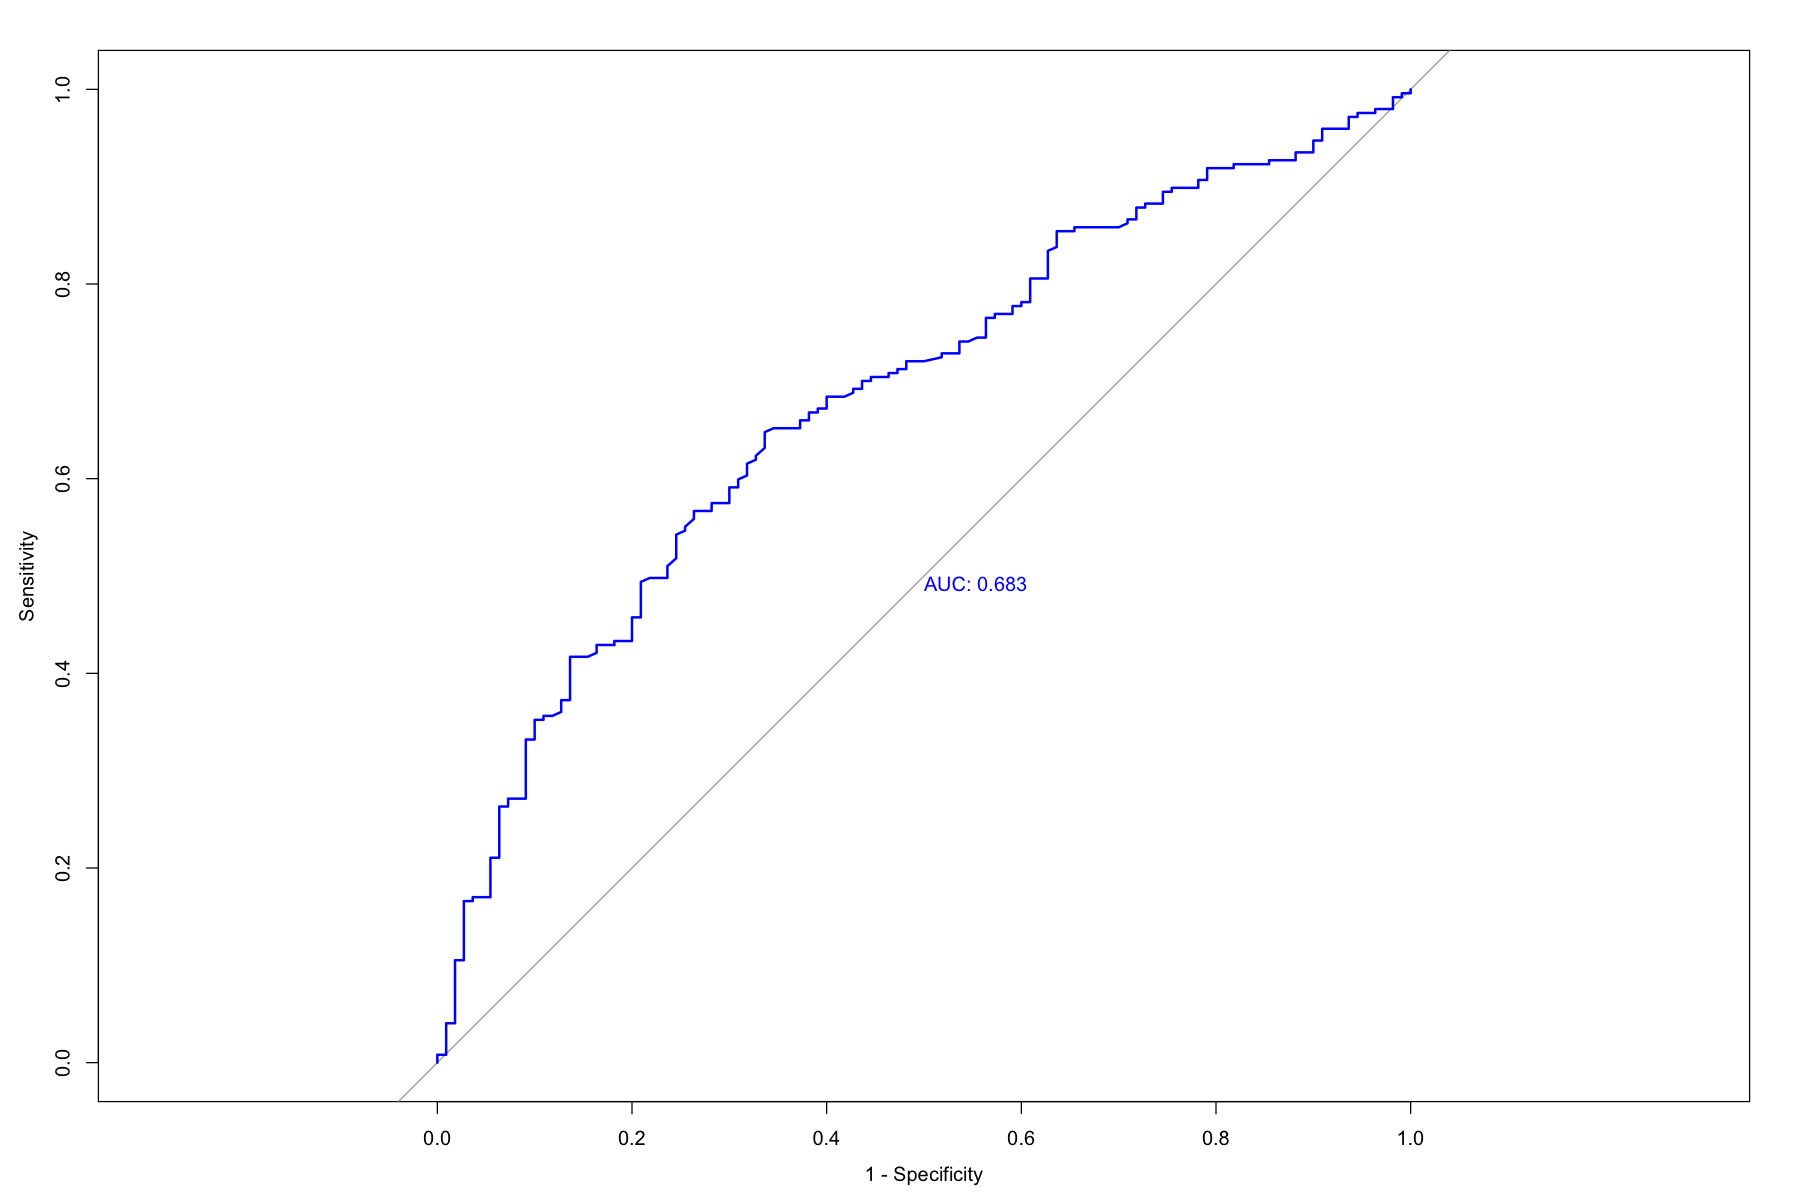

In [80]:
library(pROC)
values.roc1 <- roc(test.set$cliente, probs.test )




options(repr.plot.width = 15, repr.plot.height = 10)
plot(values.roc1, legacy.axes=TRUE, xlim=c(1.0, 0.0), print.auc=TRUE, auc.polygon=FALSE,col="blue")


### LDA

Let's now select a training set consider 60% of data and test set with 40%. The seed is set to 222.

In [81]:
## upload the library
library(MASS)
n <- nrow(mydata)
set.seed(222)
selection <- sample(n, 0.60*n, replace=FALSE)
training.set <- mydata[selection, ]
test.set <- mydata[-selection, ]
model.mydata.lda <- lda(cliente ~ durata + storico + scopo + s(eta,3), data=training.set)
model.mydata.lda

Call:
lda(cliente ~ durata + storico + scopo + s(eta, 3), data = training.set)

Prior probabilities of groups:
        0         1 
0.2728972 0.7271028 

Group means:
    durata storicoregolare scopoaltro scopoautomobile scopocasa scopoistruzione
0 24.65068       0.2739726 0.02739726       0.3356164 0.4383562      0.05479452
1 18.41388       0.4215938 0.03341902       0.3213368 0.5089974      0.03341902
  s(eta, 3)
0  31.89726
1  35.56555

Coefficients of linear discriminants:
                         LD1
durata          -0.068879814
storicoregolare  0.785124234
scopoaltro       0.678506385
scopoautomobile  0.004455343
scopocasa        0.473646377
scopoistruzione -1.117495185
s(eta, 3)        0.037053448

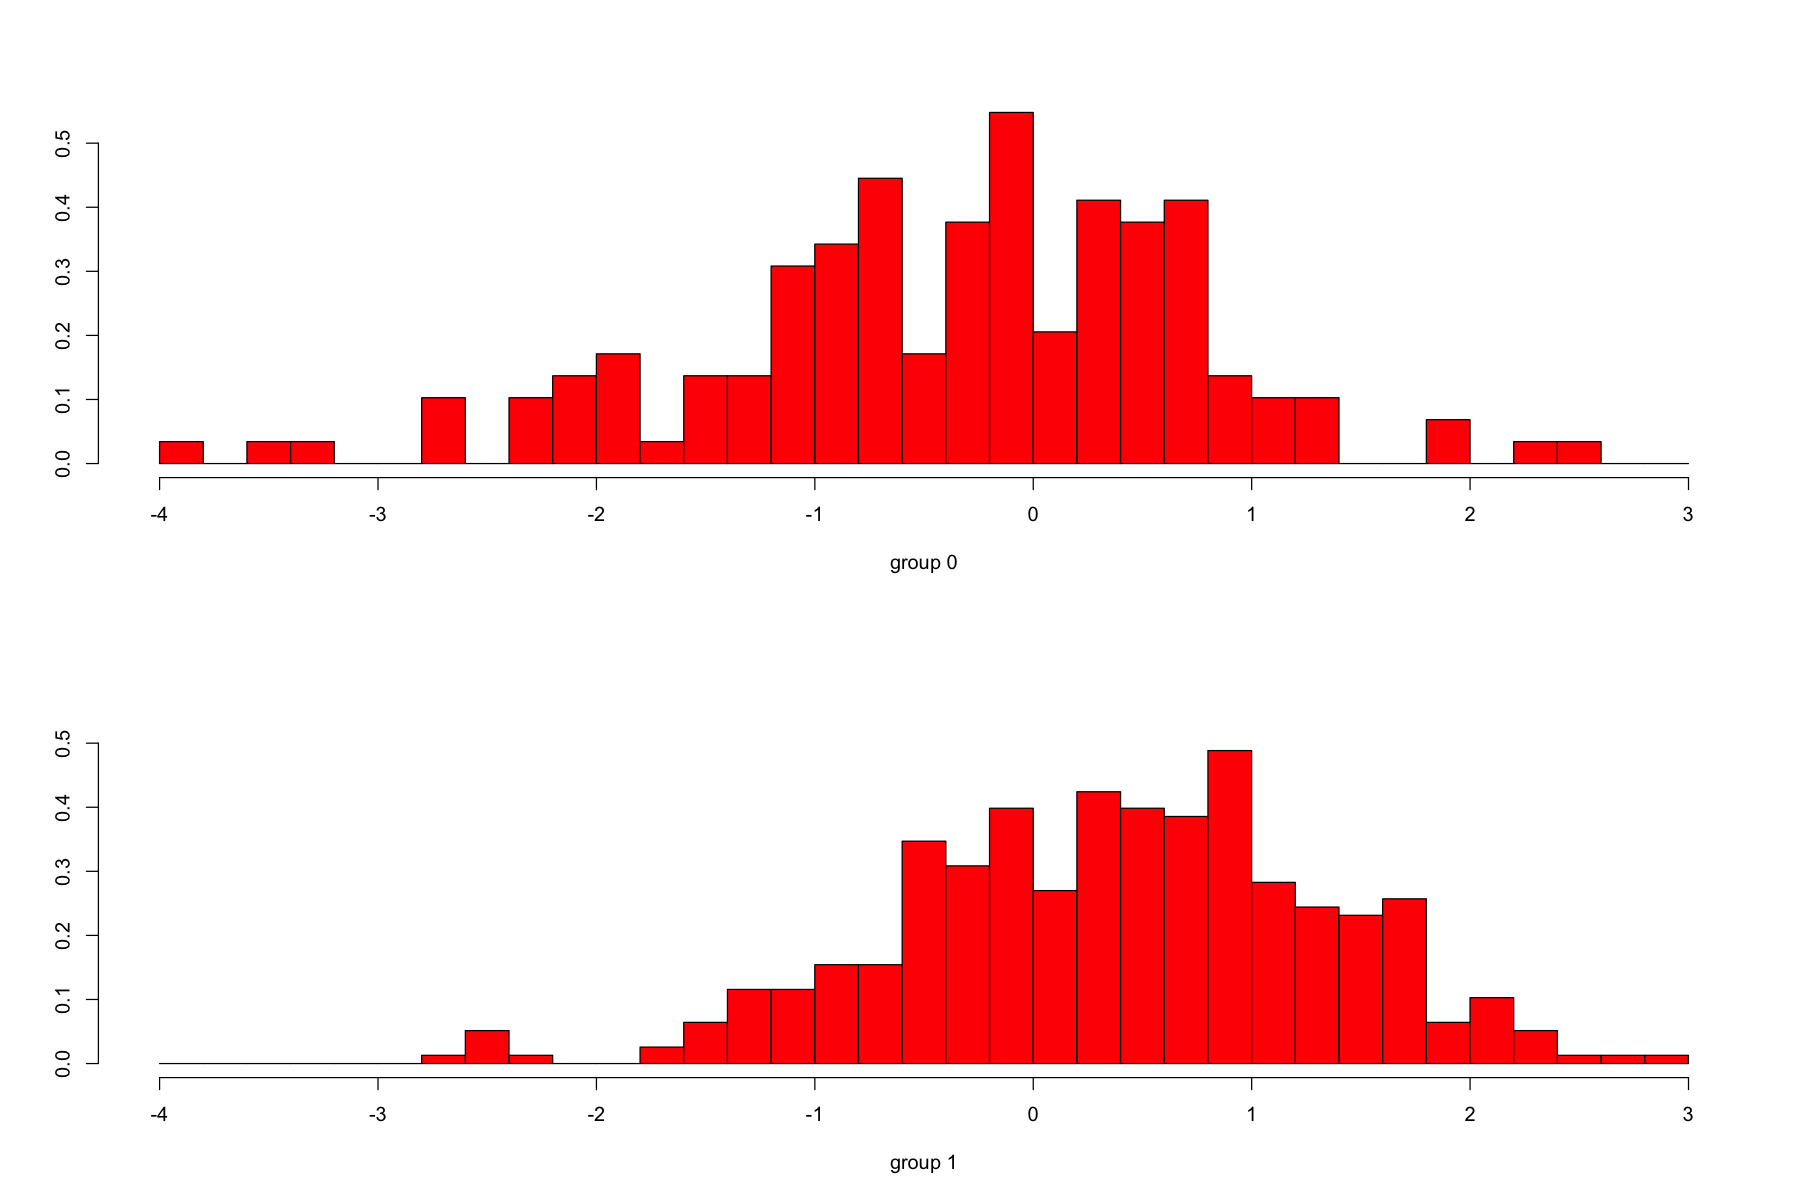

In [82]:
plot(model.mydata.lda,col="red")
par(mfrow=c(1,1))

if the discriminant function is a good function we can separate very good the two histograms otherwise not. In the case above we see a partially overleapping meaning that the discriminant function is not so good. This could also happen because the observations are few and splitting the data set into 2 samples could be
bad for the analysis.
QDA could be also worse but we will check it later on.
The confusion matrix is:

In [83]:
preds.lda <- predict(model.mydata.lda, test.set)
preds.lda1 <- rep(0, nrow(test.set))
preds.lda1[preds.lda$posterior[,2]>0.5] <- 1
addmargins(table(predictions=preds.lda1, y=test.set$cliente))

,0,1,Sum
0,11,16,27
1,99,231,330
Sum,110,247,357


- test error rate is: 115/357  
- sensitivity is: 231/247
- specitivity is: 11/110


So usign  model with lda (with interaction obtained in the previous logistic model) and evaluate it in a training set and test set, leads to an error on the test set equal too  36%, which is a bit high but acceptable.

The below figure shows how the test data has been classified. The Predicted Group-1 and Group-2 has been colored with actual classification with black and red color. The mix of red and green color in the Group-1 and Group-2 shows the incorrect classification prediction.

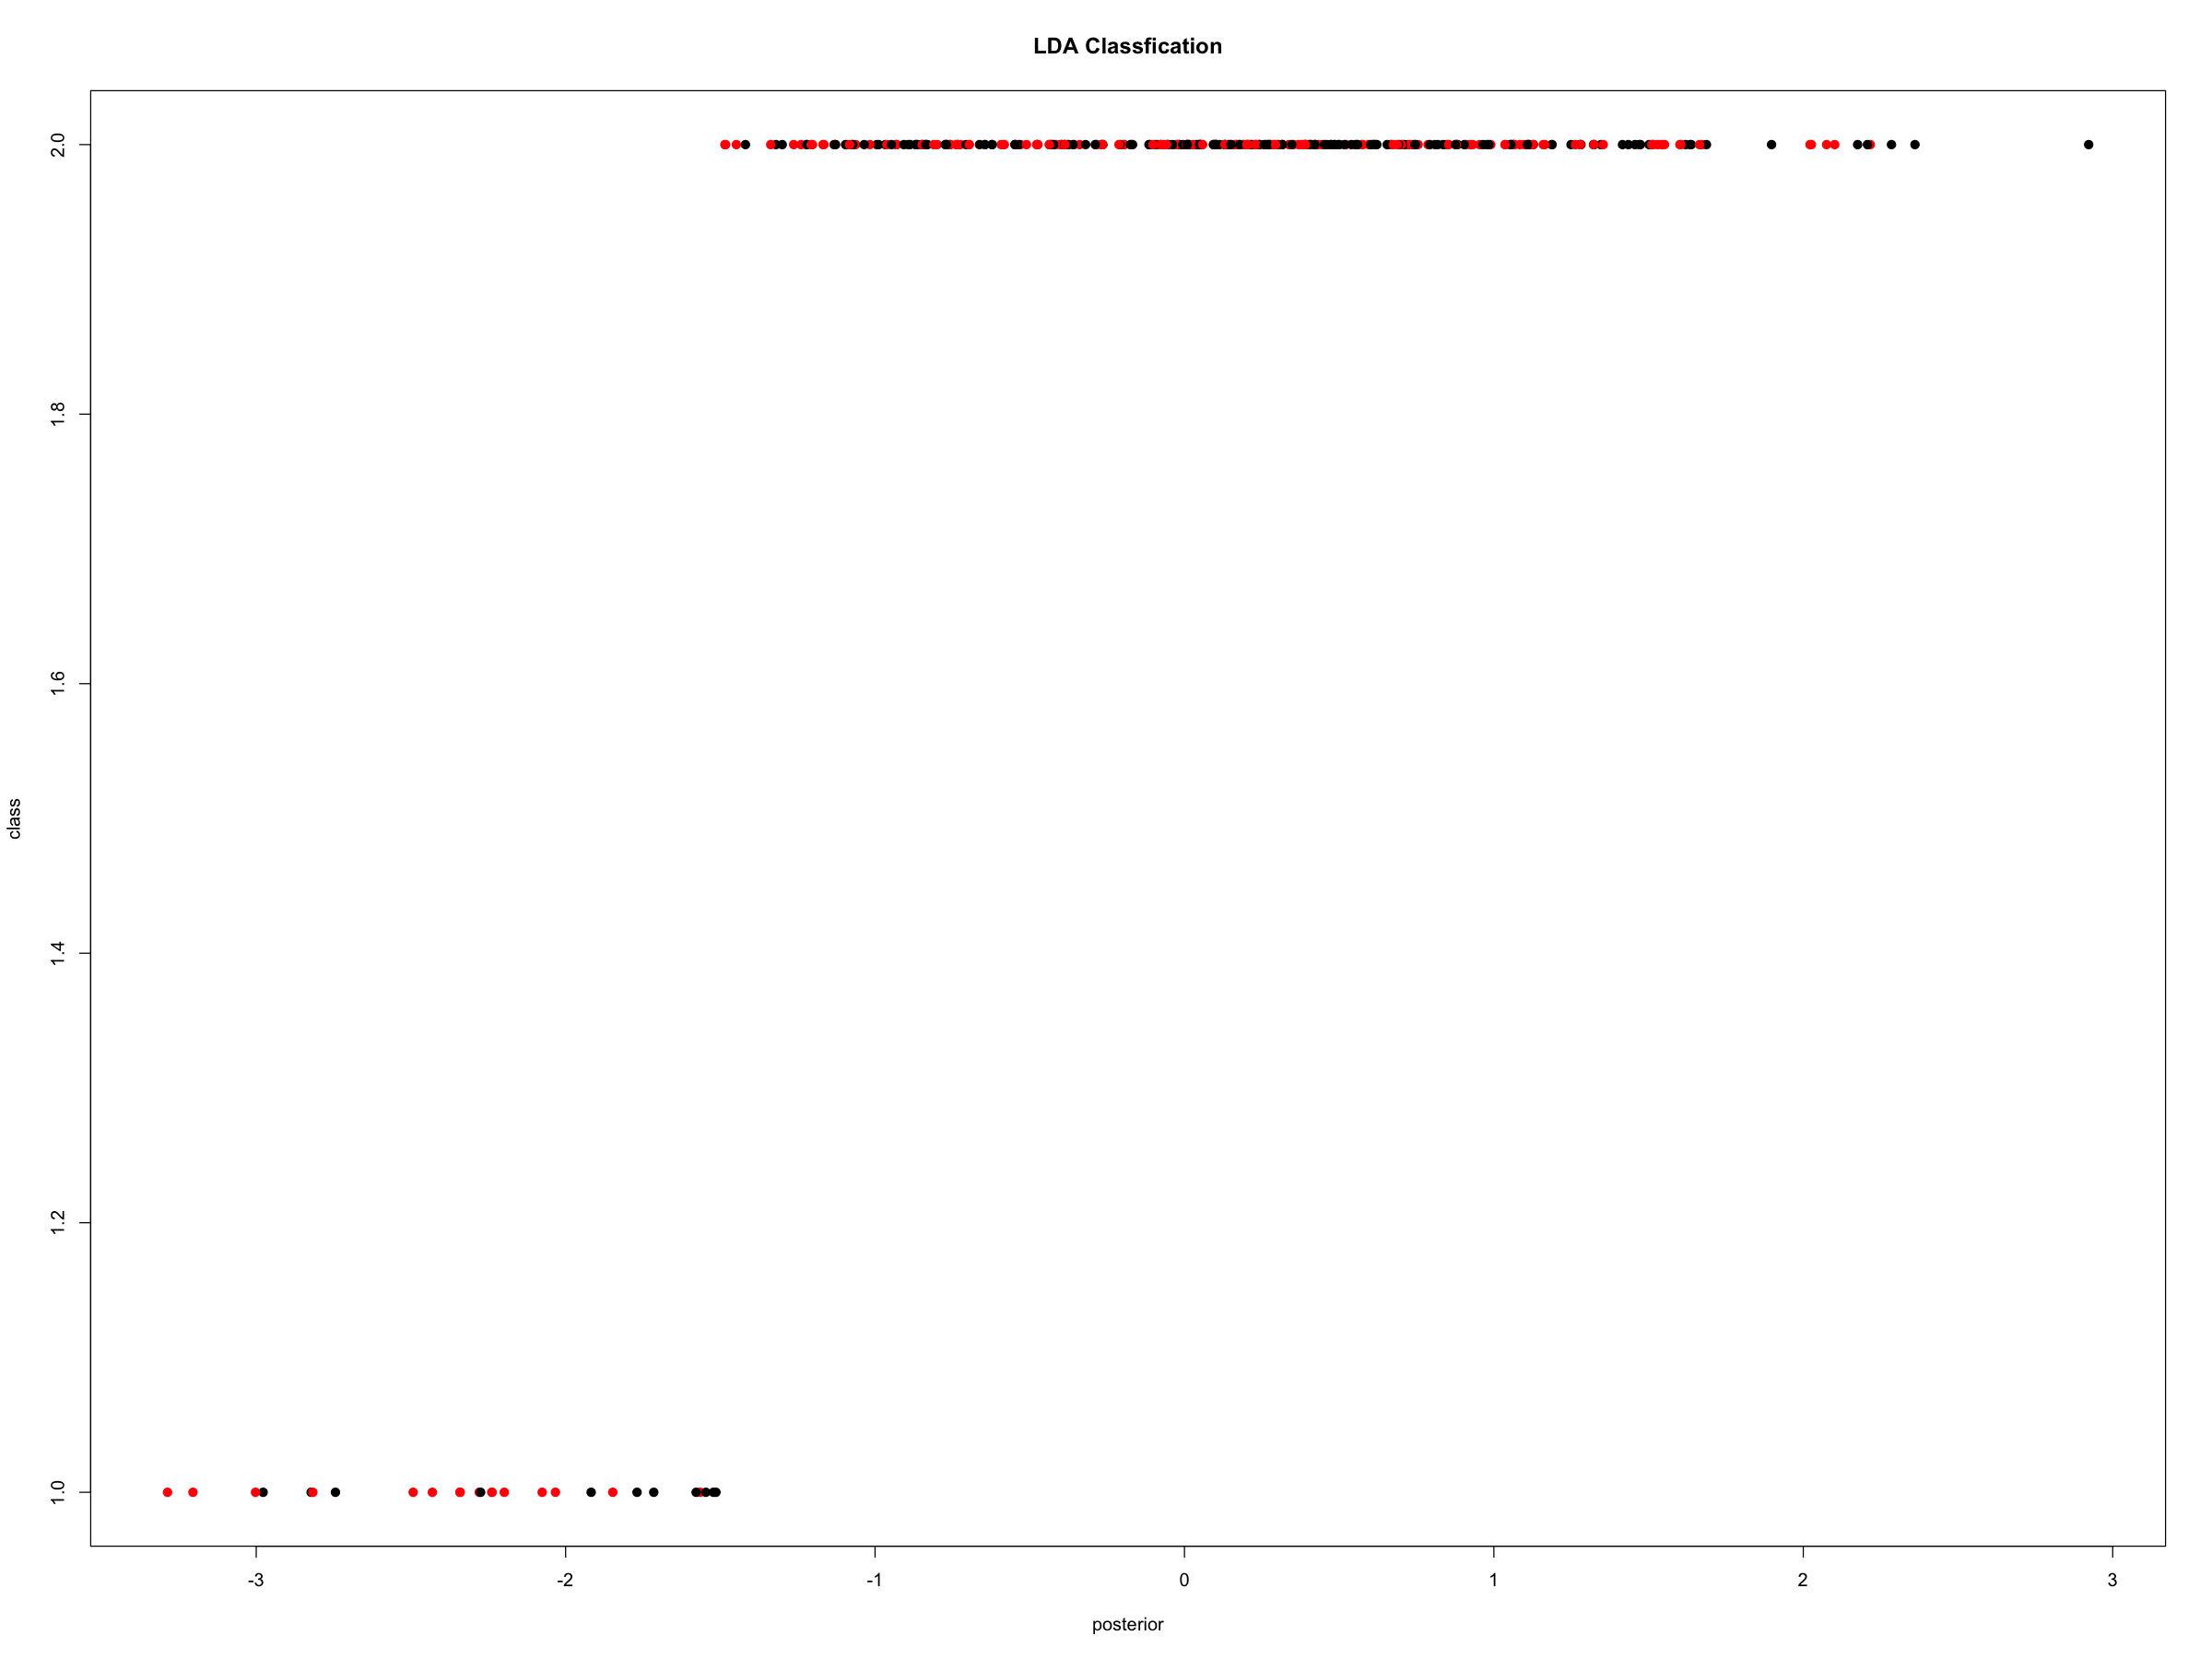

In [98]:
par(mfrow=c(1,1))
plot(preds.lda$x[,1], preds.lda$class, col=c(1,2),xlab="posterior",ylab="class",pch=19,main="LDA Classfication")



Let's now consider the ROC curve for in order to understand how good is our classifier. 
WE can see that the AUC value is 0.782
we know that as much closer AUC is to 1 much the model is good, so in this case is not so bad but we would rather have an higher value.
It is also smaller ( even if they are pretty similar) then the one obtained with Logistic Regression, so we can say that logistic regression is better in this case.

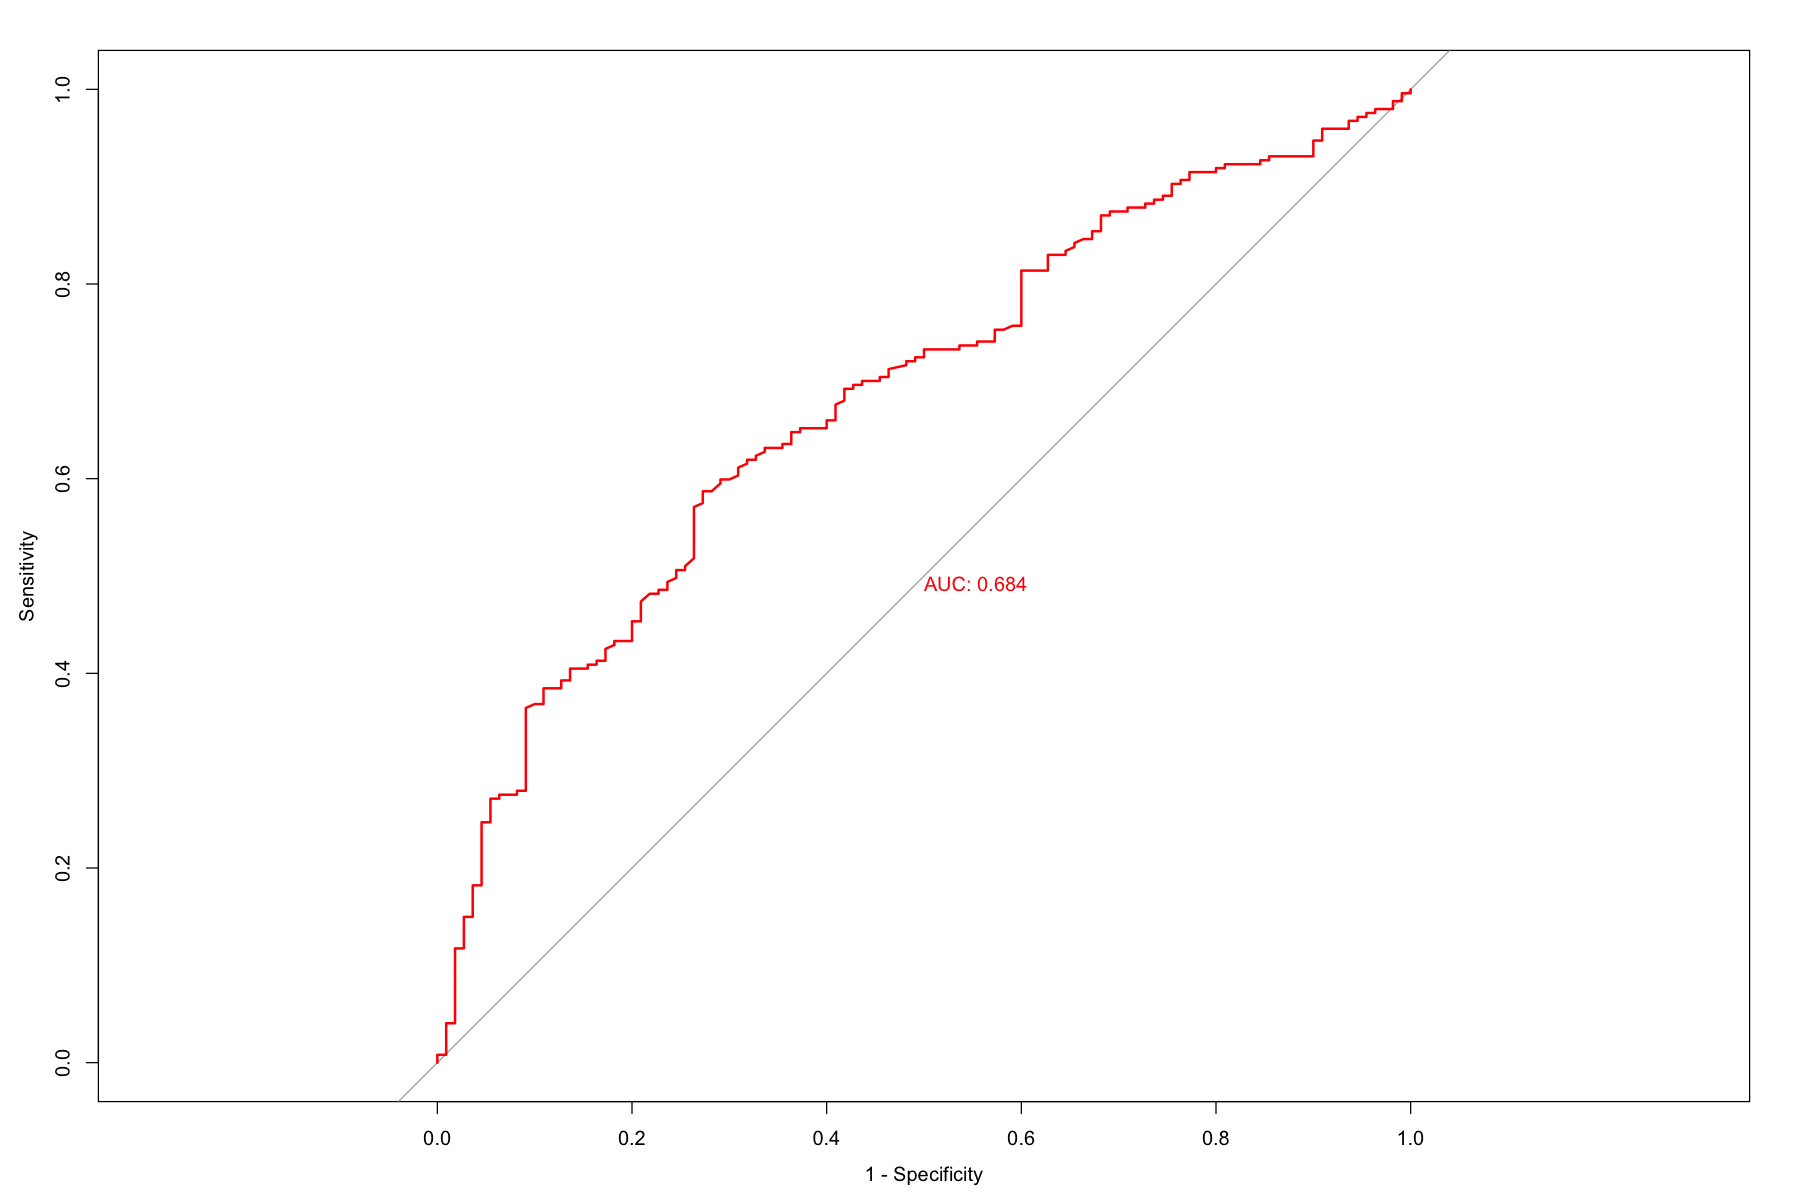

In [100]:
## ROC curve
library(pROC)

values.roc2 <- roc(test.set$cliente, preds.lda$posterior[,2] )




options(repr.plot.width = 15, repr.plot.height = 10)
plot(values.roc2, legacy.axes=TRUE, xlim=c(1.0, 0.0),print.auc=TRUE, auc.polygon=FALSE,col="red")
#plot(values.roc, legacy.axes=TRUE, xlim=c(1.0, 0.0), print.auc=TRUE, auc.polygon.col=TRUE)

# COMMENTARE

### QDA
Let's perform QDA. 
The confusion matrix is:

In [22]:
## fit with qda
model.mydata.qda <- qda(cliente ~ durata + storico + scopo + s(eta,3), data=training.set)
# prediction and missclassification table
preds.qda <- predict(model.mydata.qda, test.set)
#preds.qda

#cat("Misclassification table")
addmargins(table(predictions=preds.qda$class, y=test.set$cliente))

,0,1,Sum
0,24,22,46
1,86,225,311
Sum,110,247,357


- test error rate is: 108/357 
- sensitivity is: 225/247 
- specitivity is: 24/110



The below figure shows how the test data has been classified. The Predicted Group-1 and Group-2 has been colored with actual classification with black and red color. The mix of red and green color in the Group-1 and Group-2 shows the incorrect classification prediction.

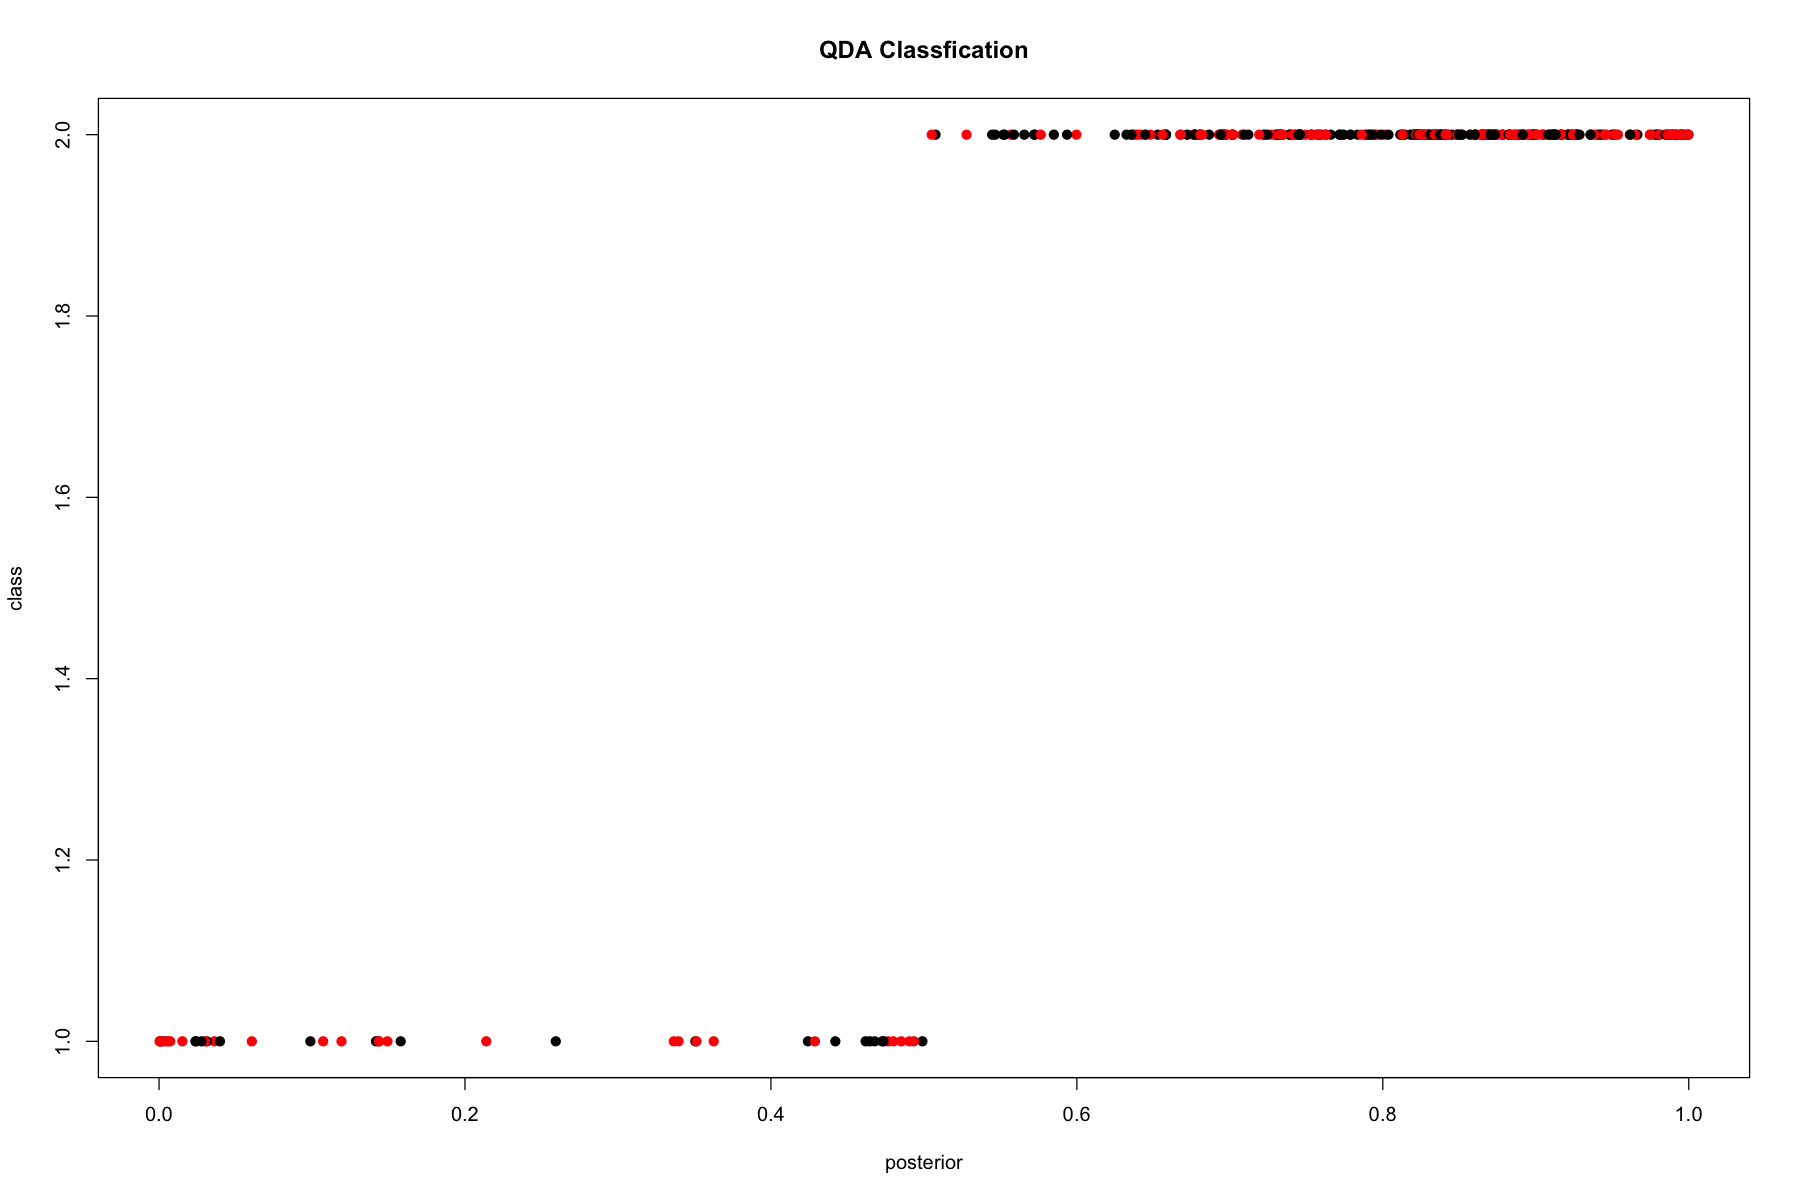

In [102]:
par(mfrow=c(1,1))
plot(preds.qda$posterior[,2], preds.qda$class,xlab="posterior",ylab="class", col=c(1,2),pch=19,main="QDA Classfication")


Let's now consider the ROC curve for in order to understand how good is our classifier. 
We can see that the AUC value is 0.763

we know that as much closer AUC is to 1 much the model is good, so in this case is not so bad but we would rather have an higher value.
It is also smaller  then the one obtained with Logistic Regression and equal to one obained with LDA, so we can say that logisti regression is better in this case.

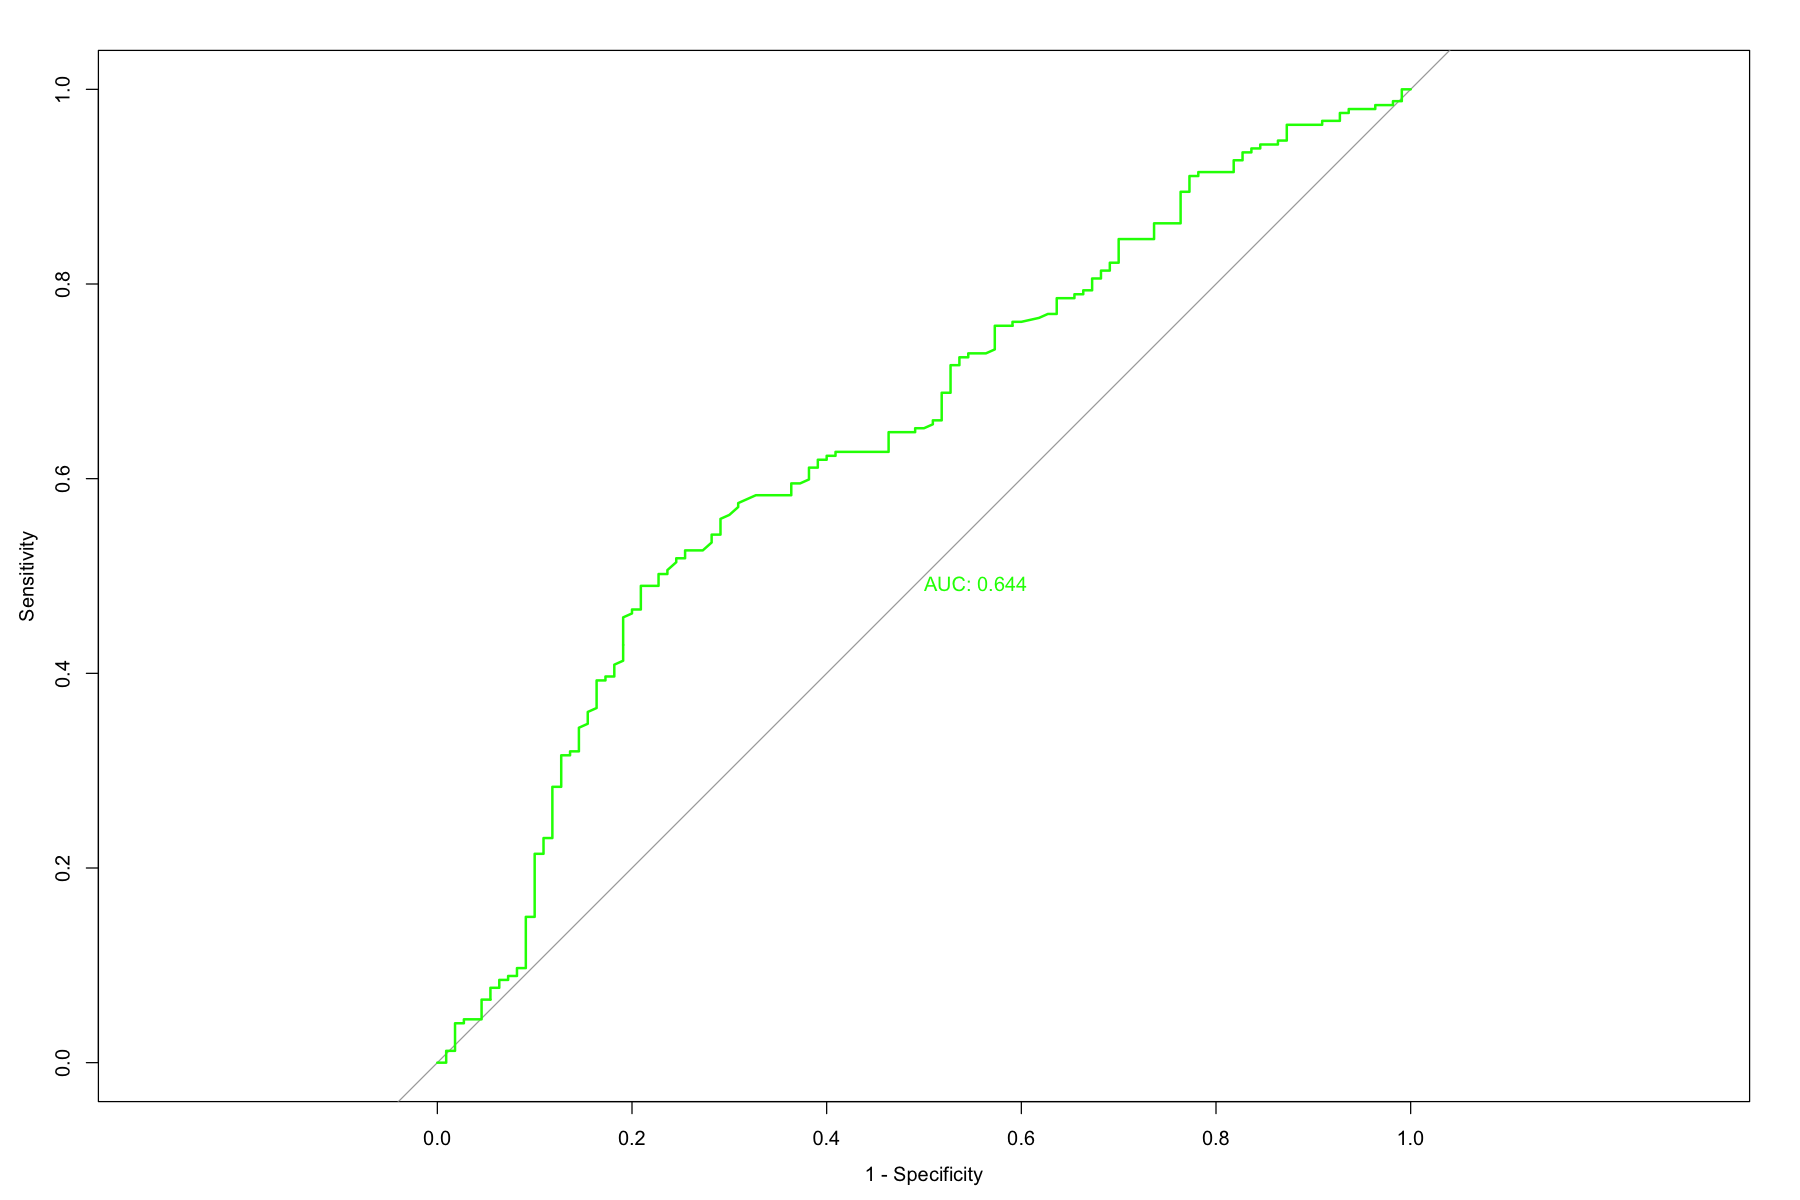

In [103]:
values.roc3 <- roc(test.set$cliente, preds.qda$posterior[,2] )
options(repr.plot.width = 15, repr.plot.height = 10)
plot(values.roc3, legacy.axes=TRUE, xlim=c(1.0, 0.0), print.auc=TRUE, auc.polygon=FALSE, col="green")


### CONCLUSION POINT 1

Based on ROC curve (plot below) we see that the best classifier is the one obtained with the Logistic Regression (Highest AUC).
So we see that:
- Budget affects positively the odds of being a high-selling film.
- cmngsoon affects positively the odds of being a high-selling film.
- actionTRUE (even if from p-value is not significant but we keep it as hierarcy principle suggests) affects positively the odds of being a high-selling film.
- actionTRUE:cmngsoon (the interaction) affects negatively the odds of being a high-selling film.

ERROR: Error in rank(prob): l'argomento "prob"  non è specificato e non ha un valore predefinito


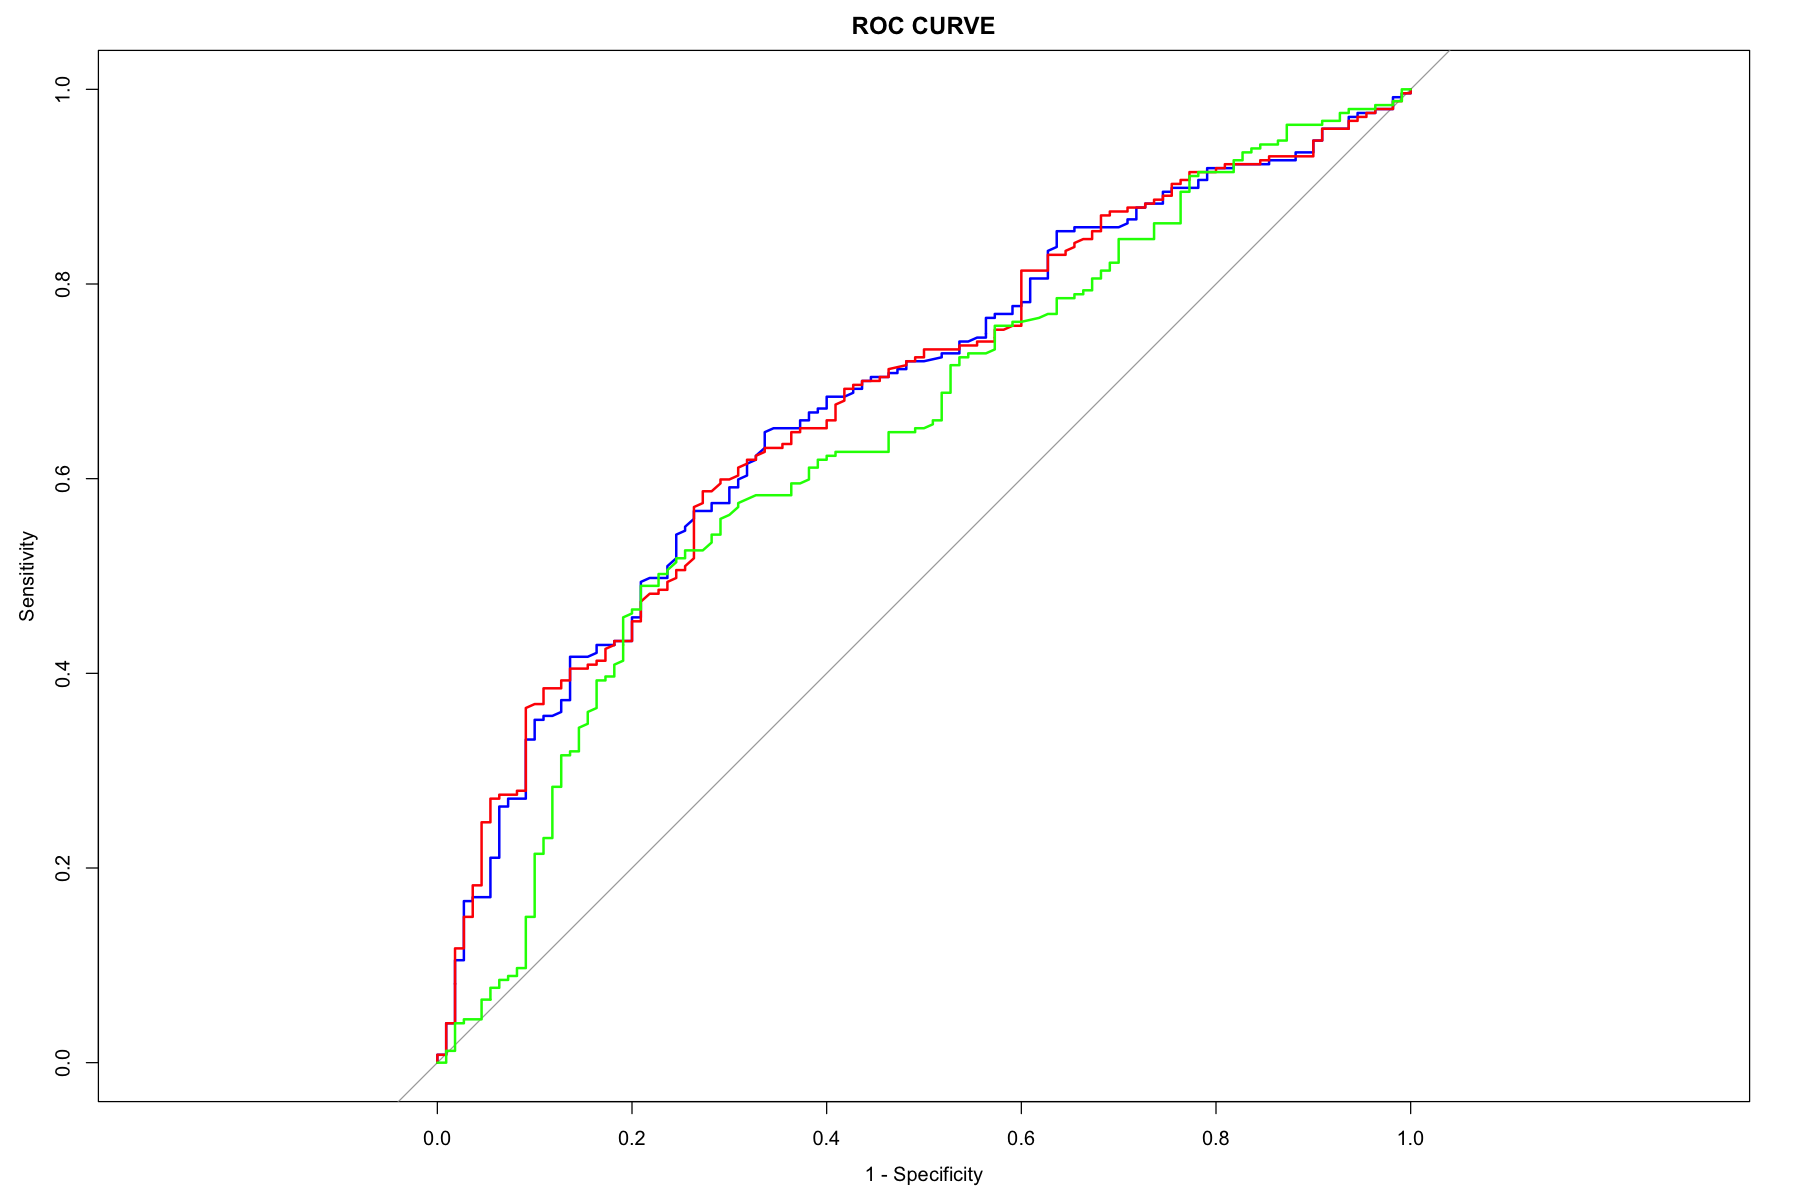

In [104]:
plot(values.roc1, legacy.axes=TRUE, xlim=c(1.0, 0.0), print.auc=FALSE, auc.polygon=FALSE,col="blue",main="ROC CURVE")
lines(values.roc2, legacy.axes=TRUE, xlim=c(1.0, 0.0),print.auc=FALSE, auc.polygon=FALSE,col="red",add=TRUE)
lines(values.roc3, legacy.axes=TRUE, xlim=c(1.0, 0.0),lty=1,print.auc=FALSE, auc.polygon=FALSE,col="green",add=TRUE)
legend("topleft",legend=c(paste0("Logistic Regression AUC =",round(auc(values.roc1),3)),paste0("LDA AUC =",round(auc(values.roc2),3)),paste0("QDA AUC =",round(auc(values.roc3),3))),lty=c(1,1,1),col=c("blue","red","green"))


# POINT 2

### LOGISTIC REGRESSION

In [24]:
model.mydata<- glm( cliente ~ ., data=mydata, family=binomial)
summary(model.mydata)


Call:
glm(formula = cliente ~ ., family = binomial, data = mydata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3239  -1.1480   0.6283   0.8258   1.6690  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      0.631590   0.408142   1.547  0.12175    
durata          -0.041222   0.006824  -6.041 1.53e-09 ***
storicoregolare  0.791907   0.173205   4.572 4.83e-06 ***
eta              0.024584   0.007990   3.077  0.00209 ** 
scopoaltro      -0.052521   0.445981  -0.118  0.90625    
scopoautomobile -0.065389   0.274989  -0.238  0.81205    
scopocasa        0.226852   0.263802   0.860  0.38983    
scopoistruzione -0.918605   0.434728  -2.113  0.03460 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1069.40  on 891  degrees of freedom
Residual deviance:  985.72  on 884  degrees of freedom
AIC: 1001.7

Number of Fisher Scoring iterati

In [25]:
## upload the library
library(MASS)
n <- nrow(mydata)
set.seed(222)
selection <- sample(n, 0.60*n, replace=FALSE)
training.set <- mydata[selection, ]
test.set <- mydata[-selection, ]
model.mydata.lda <- lda(cliente ~ durata + storico + scopo + s(eta,3), data=training.set)
model.mydata.lda

Call:
lda(cliente ~ durata + storico + scopo + s(eta, 3), data = training.set)

Prior probabilities of groups:
        0         1 
0.2728972 0.7271028 

Group means:
    durata storicoregolare scopoaltro scopoautomobile scopocasa scopoistruzione
0 24.65068       0.2739726 0.02739726       0.3356164 0.4383562      0.05479452
1 18.41388       0.4215938 0.03341902       0.3213368 0.5089974      0.03341902
  s(eta, 3)
0  31.89726
1  35.56555

Coefficients of linear discriminants:
                         LD1
durata          -0.068879814
storicoregolare  0.785124234
scopoaltro       0.678506385
scopoautomobile  0.004455343
scopocasa        0.473646377
scopoistruzione -1.117495185
s(eta, 3)        0.037053448

### RIDGE

In [48]:
load("mutuo.RData")
mydata<-mutuo
library(glmnet)

y <-  mydata$cliente
X <- model.matrix(cliente ~ . , data=mydata)[,-1]
m.ridge <- glmnet(X, y, alpha=0,family='binomial')
m.ridge



Call:  glmnet(x = X, y = y, family = "binomial", alpha = 0) 

       Df      %Dev    Lambda
  [1,] 16 1.130e-14 97.330000
  [2,] 16 7.203e-04 88.690000
  [3,] 16 7.902e-04 80.810000
  [4,] 16 8.667e-04 73.630000
  [5,] 16 9.506e-04 67.090000
  [6,] 16 1.043e-03 61.130000
  [7,] 16 1.143e-03 55.700000
  [8,] 16 1.254e-03 50.750000
  [9,] 16 1.375e-03 46.240000
 [10,] 16 1.507e-03 42.130000
 [11,] 16 1.652e-03 38.390000
 [12,] 16 1.811e-03 34.980000
 [13,] 16 1.985e-03 31.870000
 [14,] 16 2.175e-03 29.040000
 [15,] 16 2.383e-03 26.460000
 [16,] 16 2.611e-03 24.110000
 [17,] 16 2.860e-03 21.970000
 [18,] 16 3.132e-03 20.020000
 [19,] 16 3.429e-03 18.240000
 [20,] 16 3.753e-03 16.620000
 [21,] 16 4.106e-03 15.140000
 [22,] 16 4.492e-03 13.800000
 [23,] 16 4.913e-03 12.570000
 [24,] 16 5.372e-03 11.450000
 [25,] 16 5.872e-03 10.440000
 [26,] 16 6.415e-03  9.510000
 [27,] 16 7.006e-03  8.665000
 [28,] 16 7.648e-03  7.895000
 [29,] 16 8.344e-03  7.194000
 [30,] 16 9.099e-03  6.555000
 [31,] 

The output reports the value fo the deviance for each value of $ \lambda$ .
We have considered 100 $ \lambda$.
Above we can see the graphical evaluation of the coefficients associated to the covariates.
We see that  16  over the graph indicate the number of covariates entering the model (it considers also the classes of a single covariate for example : covariate "scopo" ->class "istruzione")as  $ \lambda$ varies: 16 is repeated, as ridge regression is not a selection method.

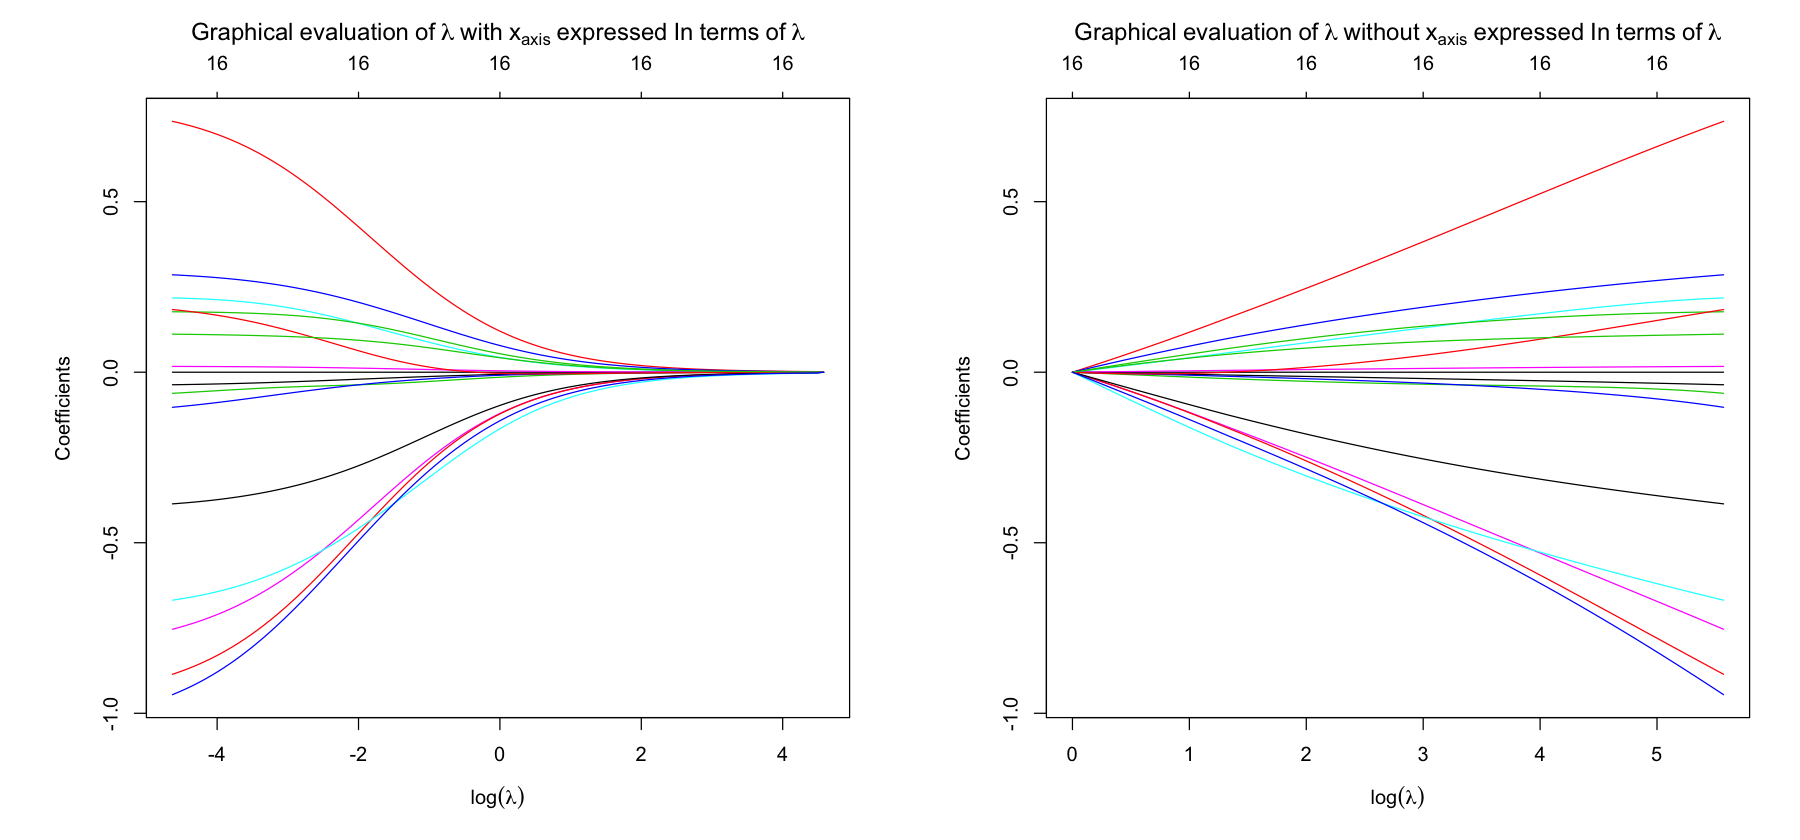

In [49]:
## plot graphical evaluation

options(repr.plot.width = 15, repr.plot.height = 7)
par(mar = c(5.1, 6.1, 4.1, 2.1))
    par(mfrow=c(1,2))

plot(m.ridge, xvar='lambda', xlab=expression(log(lambda)))
title(expression(Graphical ~ evaluation ~of~ symbol(l)~with~x[axis]~expressed~In~terms~of~symbol(l)),line=2.7)
plot(m.ridge, xlab=expression(log(lambda)))
title(expression(Graphical ~ evaluation ~of~ symbol(l)~without~x[axis]~expressed~In~terms~of~symbol(l)),line=2.7)

Now let's look for the best $\lambda$ using cross validation.
The plot below shows the values of $cvm$ for each $log(\lambda)$ together with the associated confidence interval. The two dashed lines are the values of minimun $log(\lambda)$  and $log(\lambda)$ $1 \sigma$ far from the minimum. \
So the best $\lambda$  from cross validation is: 0.1 \
And the MSE is:0.185

[1] 0.04732993

[1] 1.099711

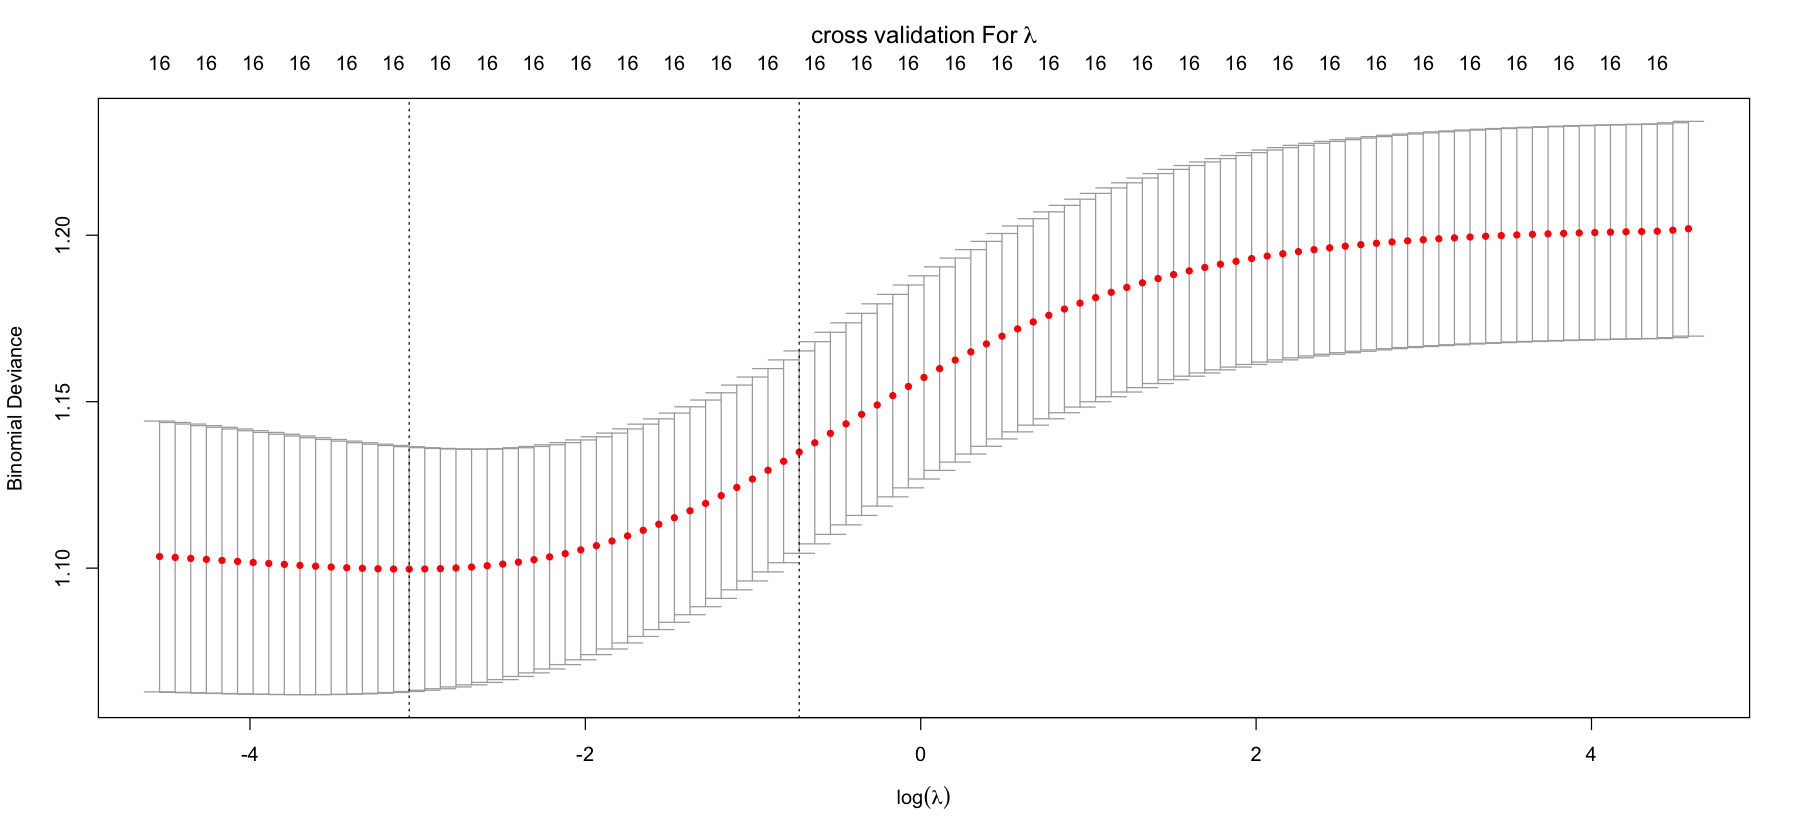

In [50]:
### cross validation plot

set.seed(2906)
options(warn=-1)
cv.ridge <- cv.glmnet(X, y, alpha=0,family='binomial')
plot(cv.ridge, xlab=expression(log(lambda)))
text(x=log(cv.ridge$lambda.min)+0.5, y=0.2, paste0(" best log(λ) =",round((log(cv.ridge$lambda.min)),4)))
title(expression(cross ~ validation ~For~ symbol(l)),line=2.7)

## best lambda and MSE

best.lambda <- cv.ridge$lambda.min
best.lambda

mse<-min(cv.ridge$cvm)
mse

Now we can Re-estimate the model using the best $\lambda$.
Below we seen the coefficients of the model, graphical representation of the coefficients for the best $\lambda$ and model deviance. \
The maximum explained deviance is obtained for the minimum (best) $\lambda$  and it is equal to:0.114


Call:  glmnet(x = X, y = y, family = "binomial", alpha = 0, lambda = best.lambda) 

     Df   %Dev  Lambda
[1,] 16 0.1093 0.04733

17 x 1 sparse Matrix of class "dgCMatrix"
                                s0
(Intercept)           1.928756e+00
durata               -2.884669e-02
storicoregolare       5.976044e-01
scopoaltro           -4.407296e-02
scopoautomobile      -6.331989e-02
scopocasa             1.912594e-01
scopoistruzione      -6.055253e-01
ammontare            -2.636693e-05
contoSi              -6.924837e-01
genereM               1.681252e-01
proprietaimmobiliari  2.532761e-01
proprietano          -5.778213e-01
eta                   1.508055e-02
casaproprietario     -3.404605e-01
disoccupatoSi         1.254802e-01
personemaggiore di 1  1.050771e-01
stranieroSi          -7.229047e-01

[1] 0.1137882

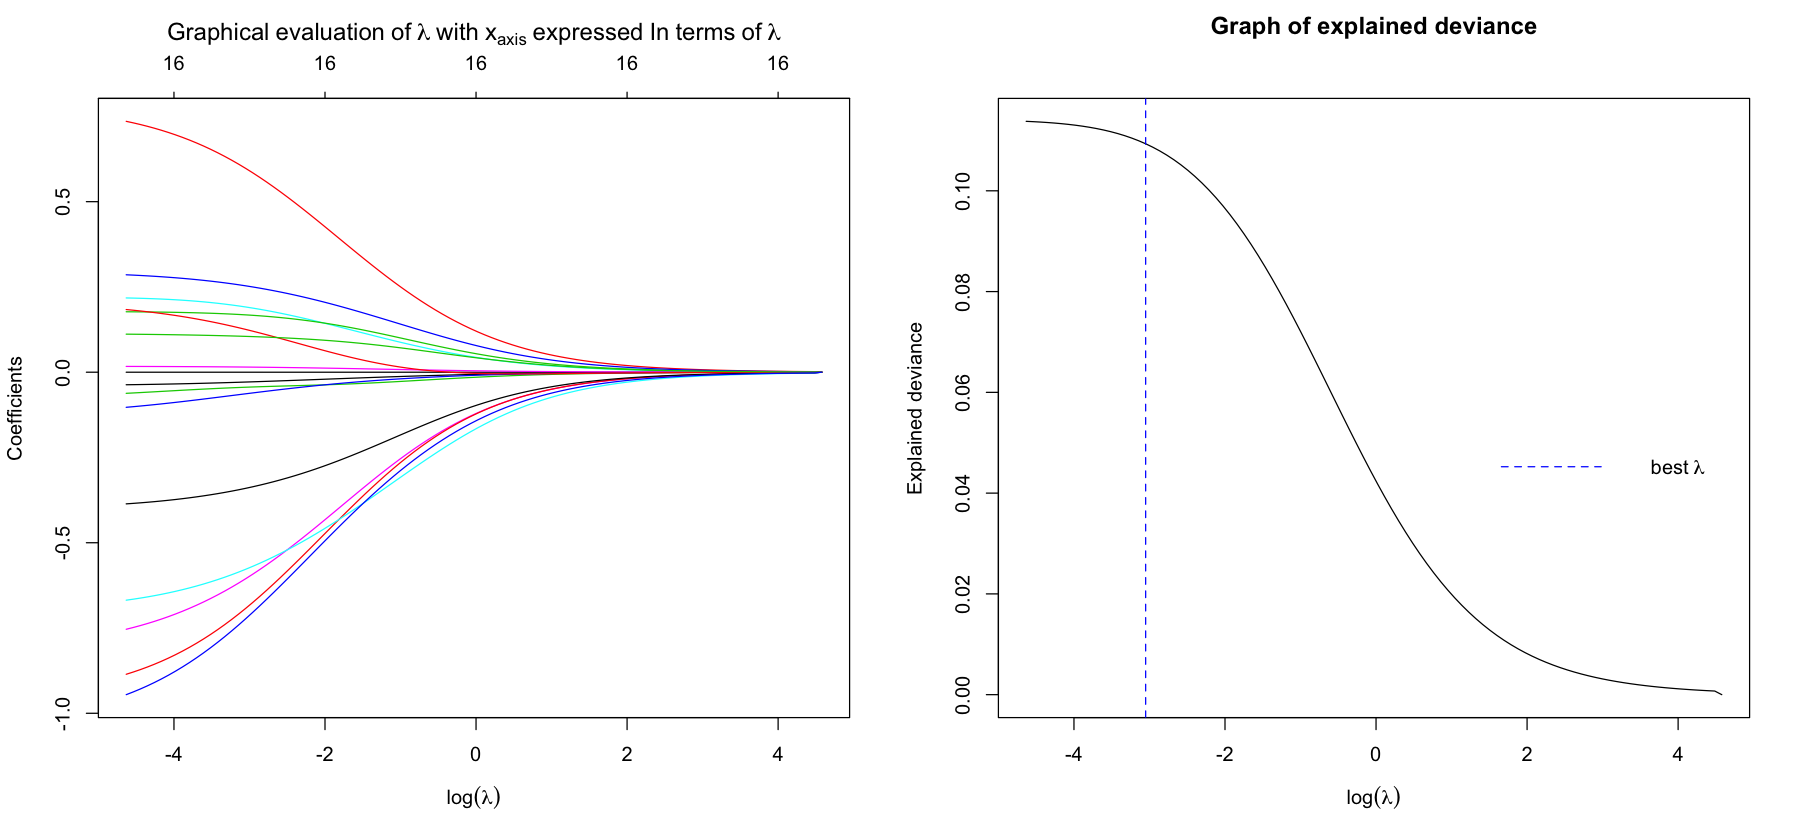

In [51]:
#### best model

m.ridge.min <- glmnet(X, y, alpha=0, lambda=best.lambda,family='binomial')
m.ridge.min
coef(m.ridge.min)

par(mfrow=c(1,2))
plot(m.ridge, xvar='lambda', xlab=expression(log(lambda))) ## add on the line corresponding to the best lambda abline(v=log(best.lambda), lty=2)
title(expression(Graphical ~ evaluation ~of~ symbol(l)~with~x[axis]~expressed~In~terms~of~symbol(l)),line=2.7)

## deviance
plot(log(m.ridge$lambda), m.ridge$dev.ratio, type='l',
       xlab=expression(log(lambda)), ylab='Explained deviance')
abline(v=log(best.lambda), lty=2,col="blue")
legend(legend = expression(best~ symbol(l)), col="blue",lt=2,x = 1,bty="n", y=0.05)
title ("Graph of explained deviance",line=2.7)


## maxi explained deviance
max(m.ridge$dev.ratio)

### LASSO
Let's perform the analysis usign lasso

In [52]:
m.lasso <- glmnet(X, y, alpha=1,family="binomial")
m.lasso


Call:  glmnet(x = X, y = y, family = "binomial", alpha = 1) 

      Df      %Dev    Lambda
 [1,]  0 1.130e-14 0.0973300
 [2,]  1 6.494e-03 0.0886900
 [3,]  1 1.180e-02 0.0808100
 [4,]  1 1.615e-02 0.0736300
 [5,]  2 2.293e-02 0.0670900
 [6,]  2 2.912e-02 0.0611300
 [7,]  3 3.514e-02 0.0557000
 [8,]  5 4.246e-02 0.0507500
 [9,]  5 5.009e-02 0.0462400
[10,]  6 5.734e-02 0.0421300
[11,]  6 6.358e-02 0.0383900
[12,]  7 6.924e-02 0.0349800
[13,]  8 7.455e-02 0.0318700
[14,]  8 7.941e-02 0.0290400
[15,] 10 8.393e-02 0.0264600
[16,] 11 8.841e-02 0.0241100
[17,] 11 9.223e-02 0.0219700
[18,] 11 9.547e-02 0.0200200
[19,] 11 9.821e-02 0.0182400
[20,] 11 1.005e-01 0.0166200
[21,] 11 1.025e-01 0.0151400
[22,] 11 1.041e-01 0.0138000
[23,] 11 1.055e-01 0.0125700
[24,] 11 1.067e-01 0.0114500
[25,] 11 1.077e-01 0.0104400
[26,] 12 1.086e-01 0.0095100
[27,] 12 1.094e-01 0.0086650
[28,] 12 1.101e-01 0.0078950
[29,] 12 1.107e-01 0.0071940
[30,] 12 1.112e-01 0.0065550
[31,] 14 1.117e-01 0.0059720
[32,] 14 

The output reports the value fo the deviance for each value of $ \lambda$ .
We have considered 54 $ \lambda$.
Above we can see the graphical evaluation of the coefficients associated to the covariates.
We see that 16 over the graph indicate the number of covariates entering the model as  $ \lambda$ varies:16 is not repeated, as lasso regression is a selection method.

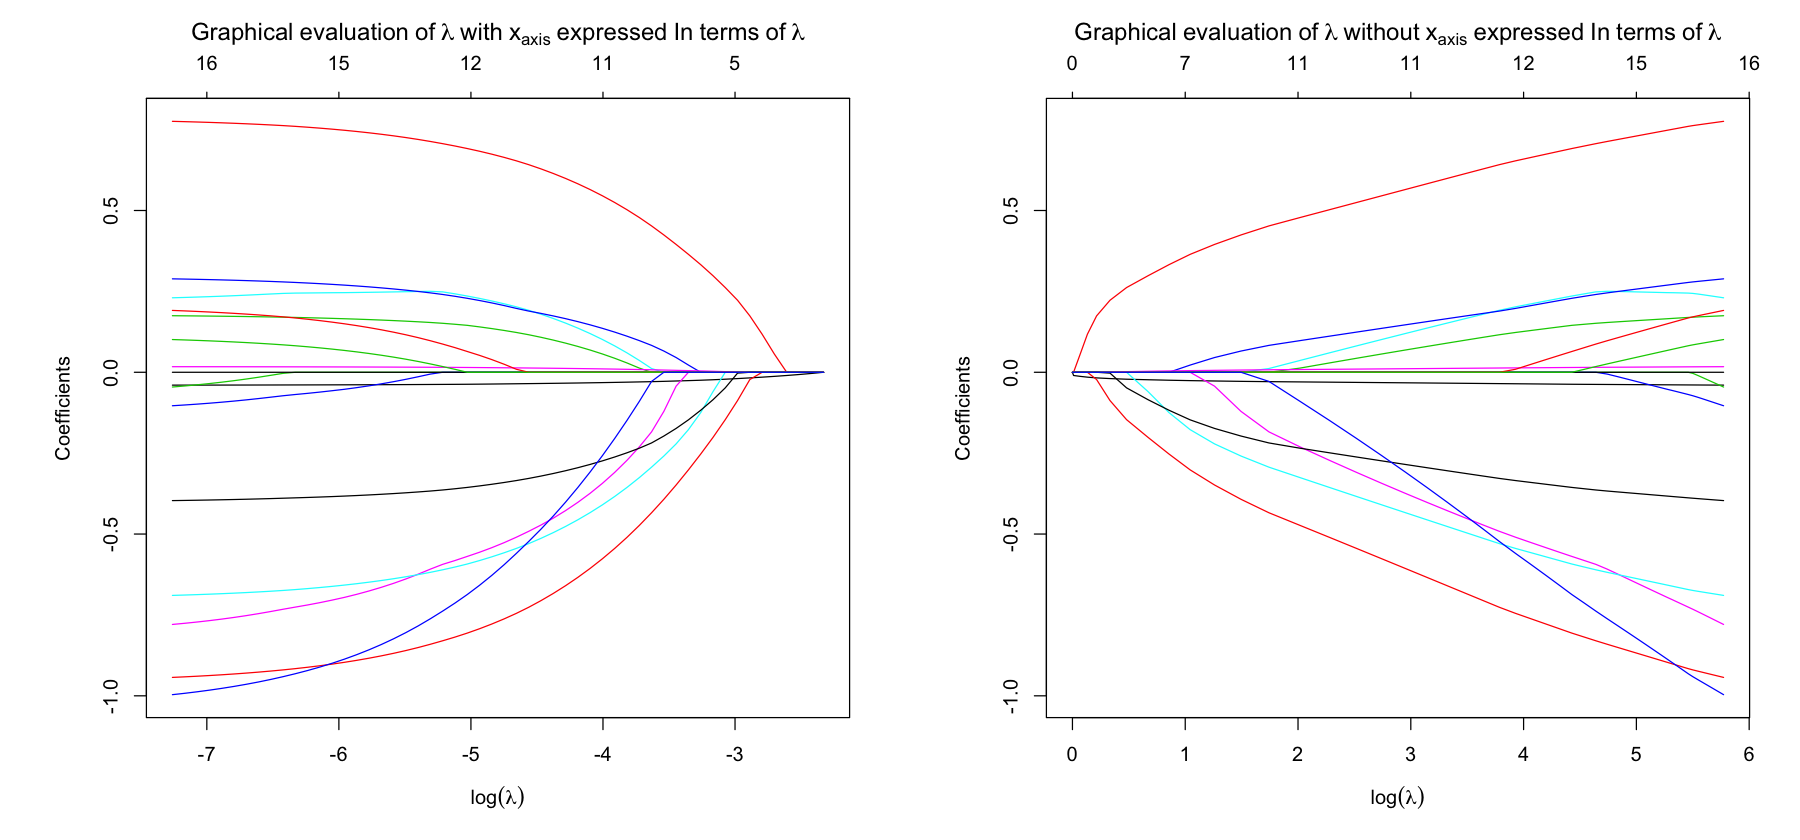

In [53]:
options(repr.plot.width = 15, repr.plot.height = 7)
par(mar = c(5.1, 6.1, 4.1, 2.1))
    par(mfrow=c(1,2))

plot(m.lasso, xvar='lambda', xlab=expression(log(lambda)))
title(expression(Graphical ~ evaluation ~of~ symbol(l)~with~x[axis]~expressed~In~terms~of~symbol(l)),line=2.7)
plot(m.lasso, xlab=expression(log(lambda)))
title(expression(Graphical ~ evaluation ~of~ symbol(l)~without~x[axis]~expressed~In~terms~of~symbol(l)),line=2.7)

Now let's look for the best $\lambda$ using cross validation.
So the best $\lambda$  from cross validation is: 0.185 \
And the MSE is:0.005

[1] 0.005441792

[1] 0.1849743

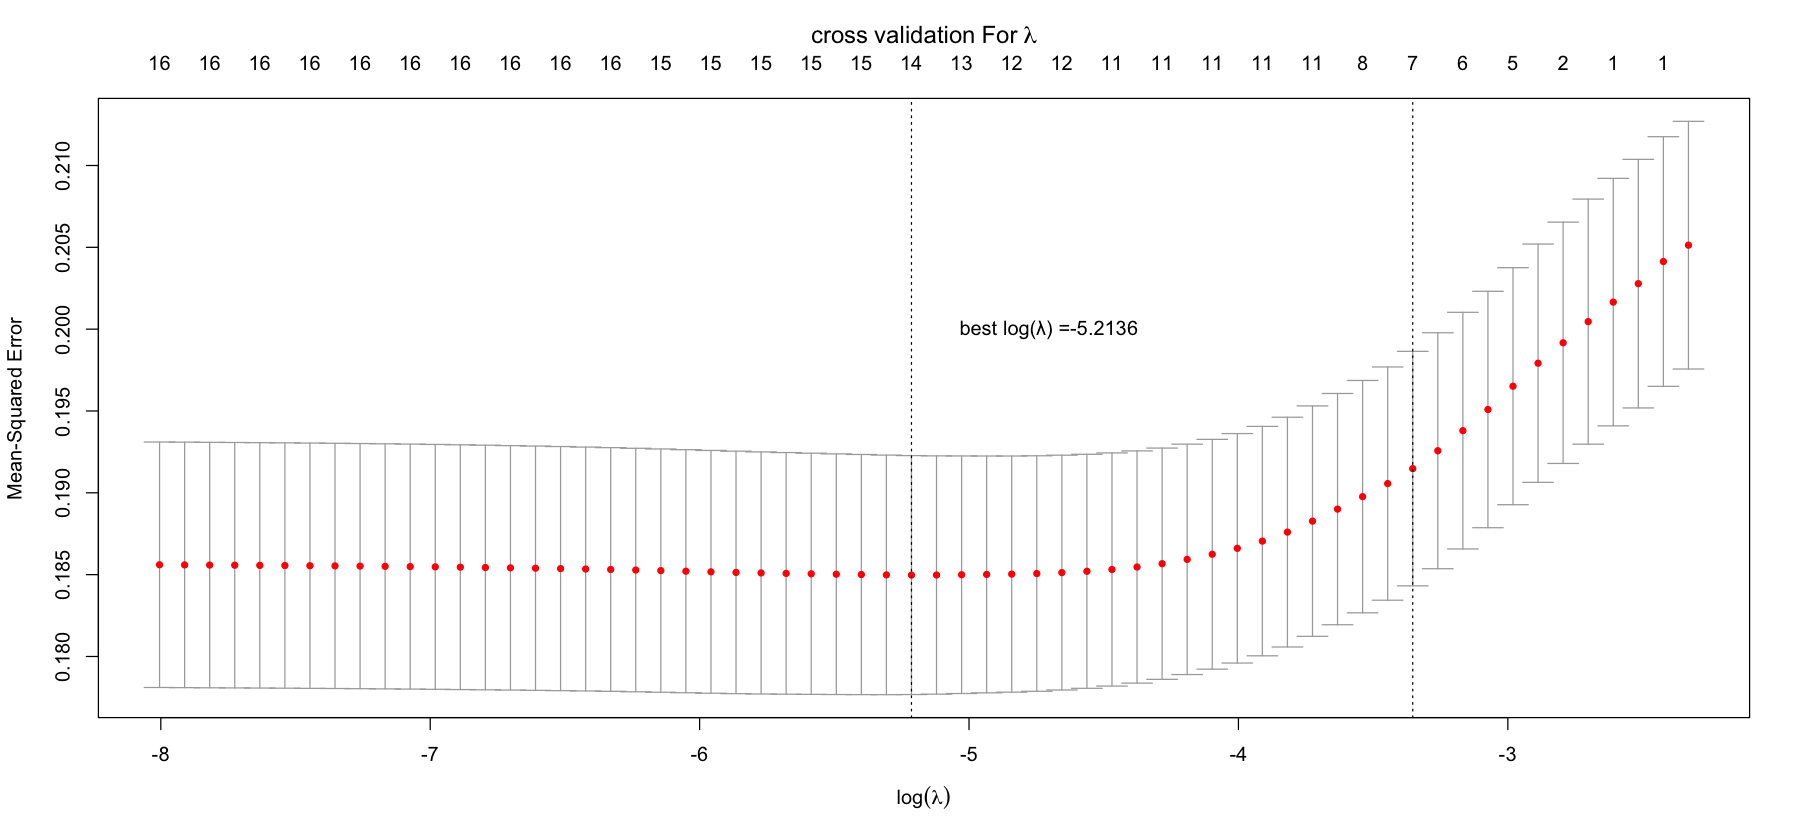

In [54]:
set.seed(2906)
options(warn=-1)
cv.lasso <- cv.glmnet(X, y, alpha=1)
plot(cv.lasso, xlab=expression(log(lambda)))
text(x=log(cv.lasso$lambda.min)+0.5, y=0.2, paste0(" best log(λ) =",round((log(cv.lasso$lambda.min)),4)))
title(expression(cross ~ validation ~For~ symbol(l)),line=2.7)

## best lambda and MSE

best.lambda <- cv.lasso$lambda.min
best.lambda

mse<-min(cv.lasso$cvm)
mse

On the basis of MSE , the model fitted with lasso is preferable. In addition, the resulting model with lasso is simplest.
Now we can Re-estimate the model using the best $\lambda$.
Below we seen the coefficients of the model, graphical representation of the coefficients for the best $\lambda$ and model deviance. \
The maximum explained deviance is obtained for the minimum (best) $\lambda$  and it is equal to: 0.114 \
Furthermore from the new coefficients we can see that some of the coefficients are zero, so the lasso performed a model selection. In particular scopoaltro e scopoautomobile have been removed


Call:  glmnet(x = X, y = y, family = "binomial", alpha = 1, lambda = best.lambda) 

     Df  %Dev   Lambda
[1,] 14 0.112 0.005442

17 x 1 sparse Matrix of class "dgCMatrix"
                                s0
(Intercept)           2.136572e+00
durata               -3.748667e-02
storicoregolare       7.064791e-01
scopoaltro            .           
scopoautomobile       .           
scopocasa             2.483647e-01
scopoistruzione      -5.936522e-01
ammontare            -1.212070e-06
contoSi              -8.297044e-01
genereM               1.513615e-01
proprietaimmobiliari  2.405319e-01
proprietano          -6.104443e-01
eta                   1.527828e-02
casaproprietario     -3.637464e-01
disoccupatoSi         8.715817e-02
personemaggiore di 1  1.763110e-02
stranieroSi          -7.378617e-01

[1] 15

[1] 0.1141077

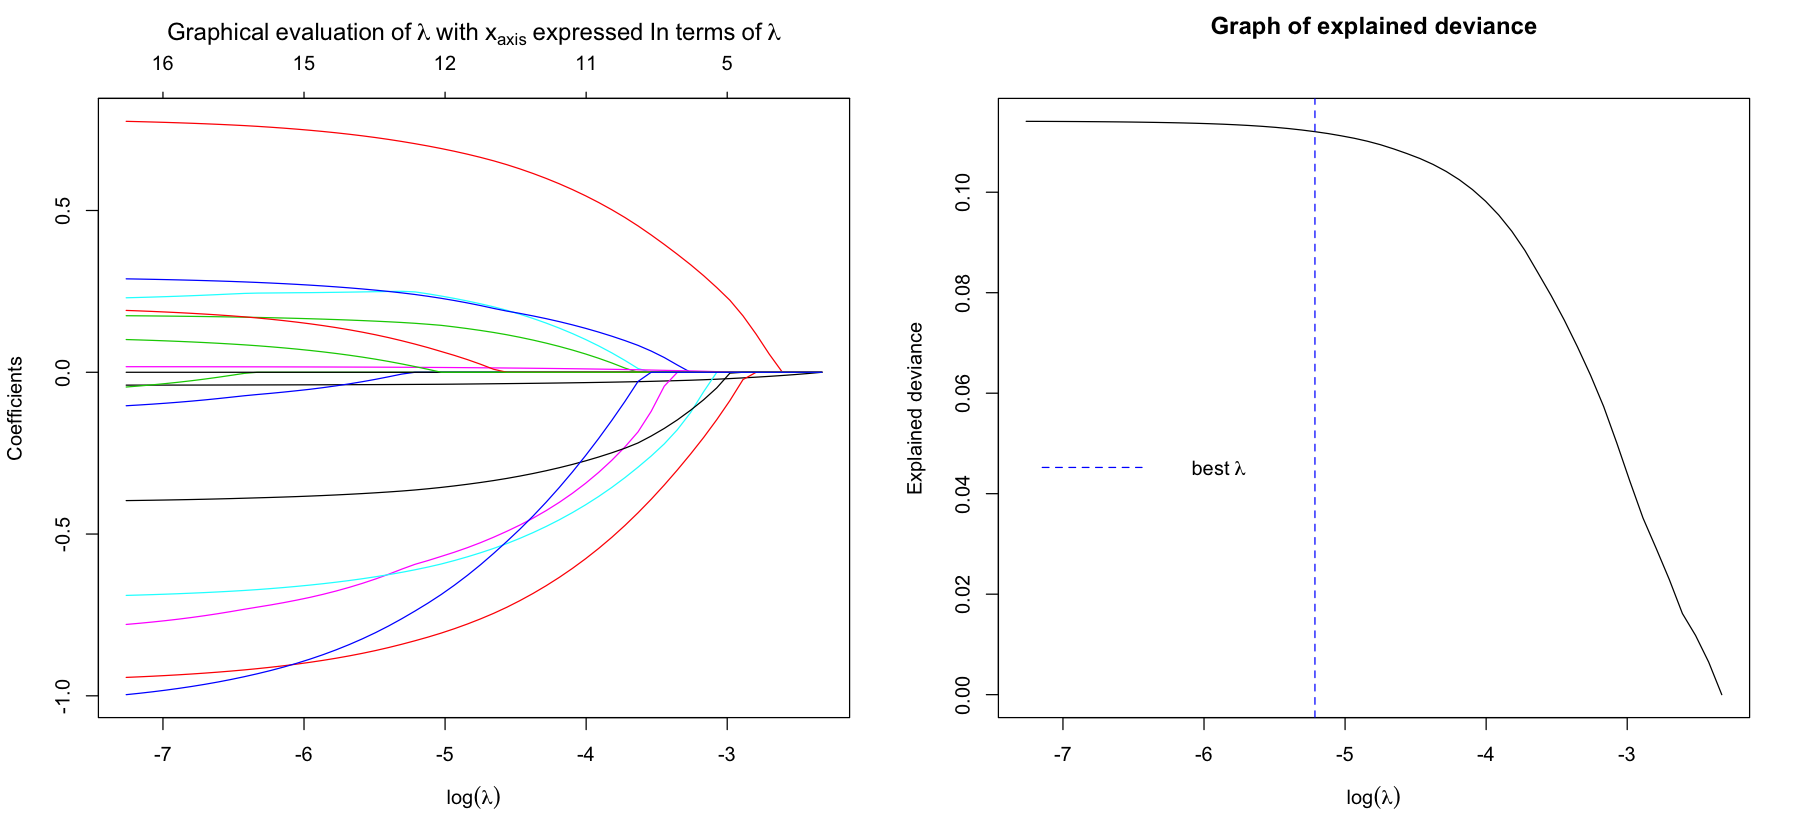

In [55]:
#### best model

m.lasso.min <- glmnet(X, y, alpha=1, lambda=best.lambda,family="binomial")
m.lasso.min
coef(m.lasso.min)

## number of coefficient diversi da 0

id.zero <- which(coef(m.lasso.min)==0)
nonzero <- length(coef(m.lasso.min))-length(id.zero)
nonzero



par(mfrow=c(1,2))
plot(m.lasso, xvar='lambda', xlab=expression(log(lambda))) ## add on the line corresponding to the best lambda abline(v=log(best.lambda), lty=2)
title(expression(Graphical ~ evaluation ~of~ symbol(l)~with~x[axis]~expressed~In~terms~of~symbol(l)),line=2.7)

## deviance
plot(log(m.lasso$lambda), m.lasso$dev.ratio, type='l',
        xlab=expression(log(lambda)), ylab='Explained deviance')
abline(v=log(best.lambda), lty=2,col="blue")
legend(legend = expression(best~ symbol(l)), col="blue",lt=2,x =-7.5,bty="n", y=0.05)
title ("Graph of explained deviance",line=2.7)


## maxi explained deviance
max(m.lasso$dev.ratio)

### PRINCIPAL COMPONENT ANALYSIS
Let's consider Principal component analysis in order to see if it is useful. Since 'prcomp' command require numeric values, all the qualitative varibales have been transformed into numeric. So forn example the "FALSE" becomes 1 and "TRUE" becomes 2. I report the first three rows of the dataset before and after the transformation in order to make clear this passage.


Then evalute whether the PC analysis can help the interpretation of the relationships between the covariates and the  response taking. We have 13 PCsC. 
Let's also plot a result fot PC1 and PC2. The plot shows the values of the scores as numbers associated to each observation in the dataset. In particular we want to understand if there are observation that are not clusterize with other observations (61 for example could be a possible outlier) and in this case we see for example 4 or 51 that could be outliers, meaning that probabibly some outlier is present.  Each PC explained an amount of deviance of the dataset (PC1 the most). The read lines are the loadings (1 for each covariate). They all start from (0,0). We see that th mprating vector is almost parallel to PC2 meaning that this particular variable contributes significantly to the explained deviance for the second PC. So first of all we look for the loadings parallel to our axis. In this case for example fandango it's the most significant for the PC1 while as  said before mprating for PC2.

Let's also look for angle $\alpha$ between two variable's loadings:

- if $\alpha$ $\rightarrow$ 0 the variables are positively correlated

- if $\alpha$ $\rightarrow$ 90 the variables are not correlated

- if $\alpha$ $\rightarrow$ 180 the variables are negatively correlated

So in this case for example box and cntwait are correlated positively, fandango nd mprating not correlated and cmngsoon and commedy negatively correlated.

In [56]:
library(pls)
set.seed(222)
#pairs(mydata[,-1], col = mydata$taking, upper.panel = NULL, pch = 16, cex = 0.5)
#legend("topright", bty = "n", legend = c("talinkg=0","taking=1"),
  #      pch = 16, col = c("black","red"))
mydata[1:3,]
mydata <- data.frame(sapply(mydata, as.numeric))
mydata[1:3,]
m.pcr <- prcomp(mydata[,-13], scale=TRUE)

dim(m.pcr$x)


durata,storico,scopo,ammontare,conto,genere,proprieta,eta,casa,disoccupato,persone,straniero,cliente
6,regolare,casa,1169,No,M,immobiliari,67,in affitto,Si,1,Si,1
48,non regolare,casa,5951,Si,F,immobiliari,22,in affitto,Si,1,Si,0
12,regolare,istruzione,2096,Si,M,immobiliari,49,in affitto,No,maggiore di 1,Si,1


durata,storico,scopo,ammontare,conto,genere,proprieta,eta,casa,disoccupato,persone,straniero,cliente
6,2,4,1169,1,2,2,67,1,2,1,2,1
48,1,4,5951,2,1,2,22,1,2,1,2,0
12,2,5,2096,2,2,2,49,1,1,2,2,1


[1] 892  12

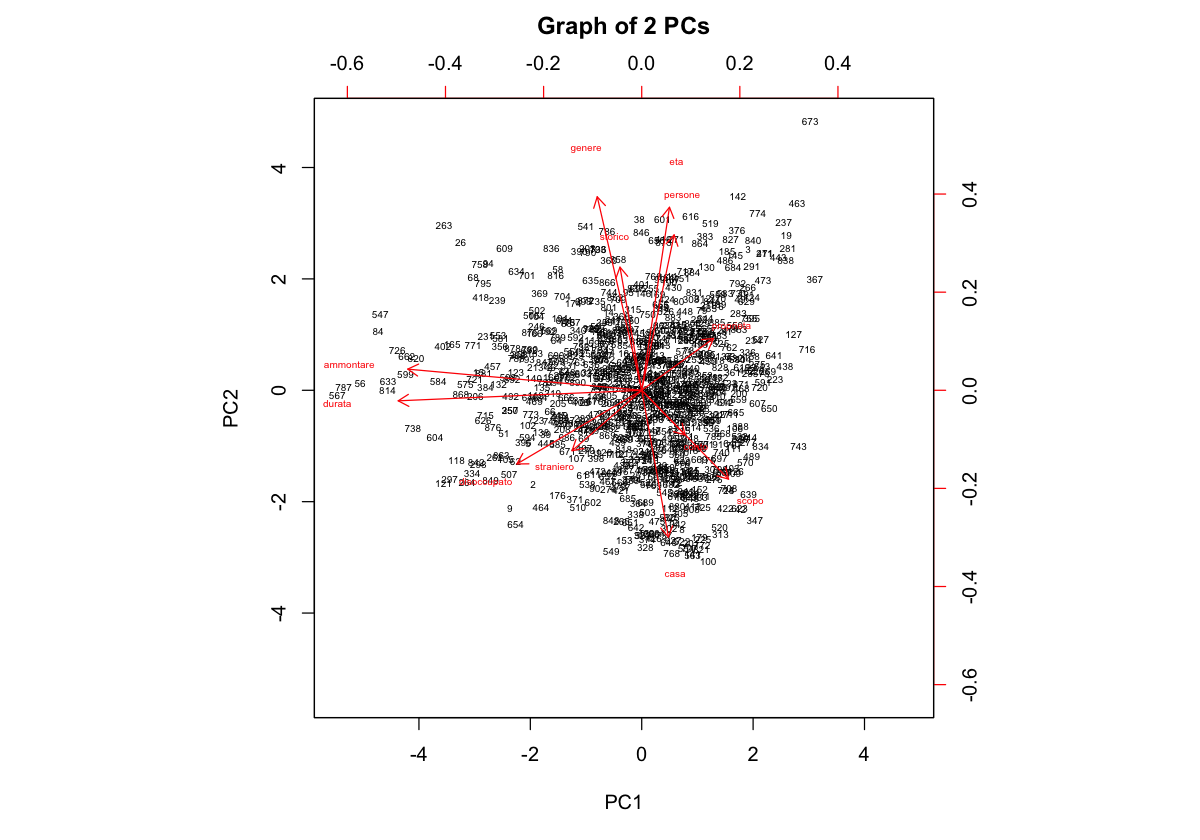

In [57]:
options(repr.plot.width = 10, repr.plot.height = 7)
biplot(m.pcr, scale=0, cex=0.5)
title ("Graph of 2 PCs",line=2.7)

Let's plot the clusterization based on taking for the first two PCs. PC1 and PC2 don't provide a satisfactory separation of the observations. They don't cluster very well our data.

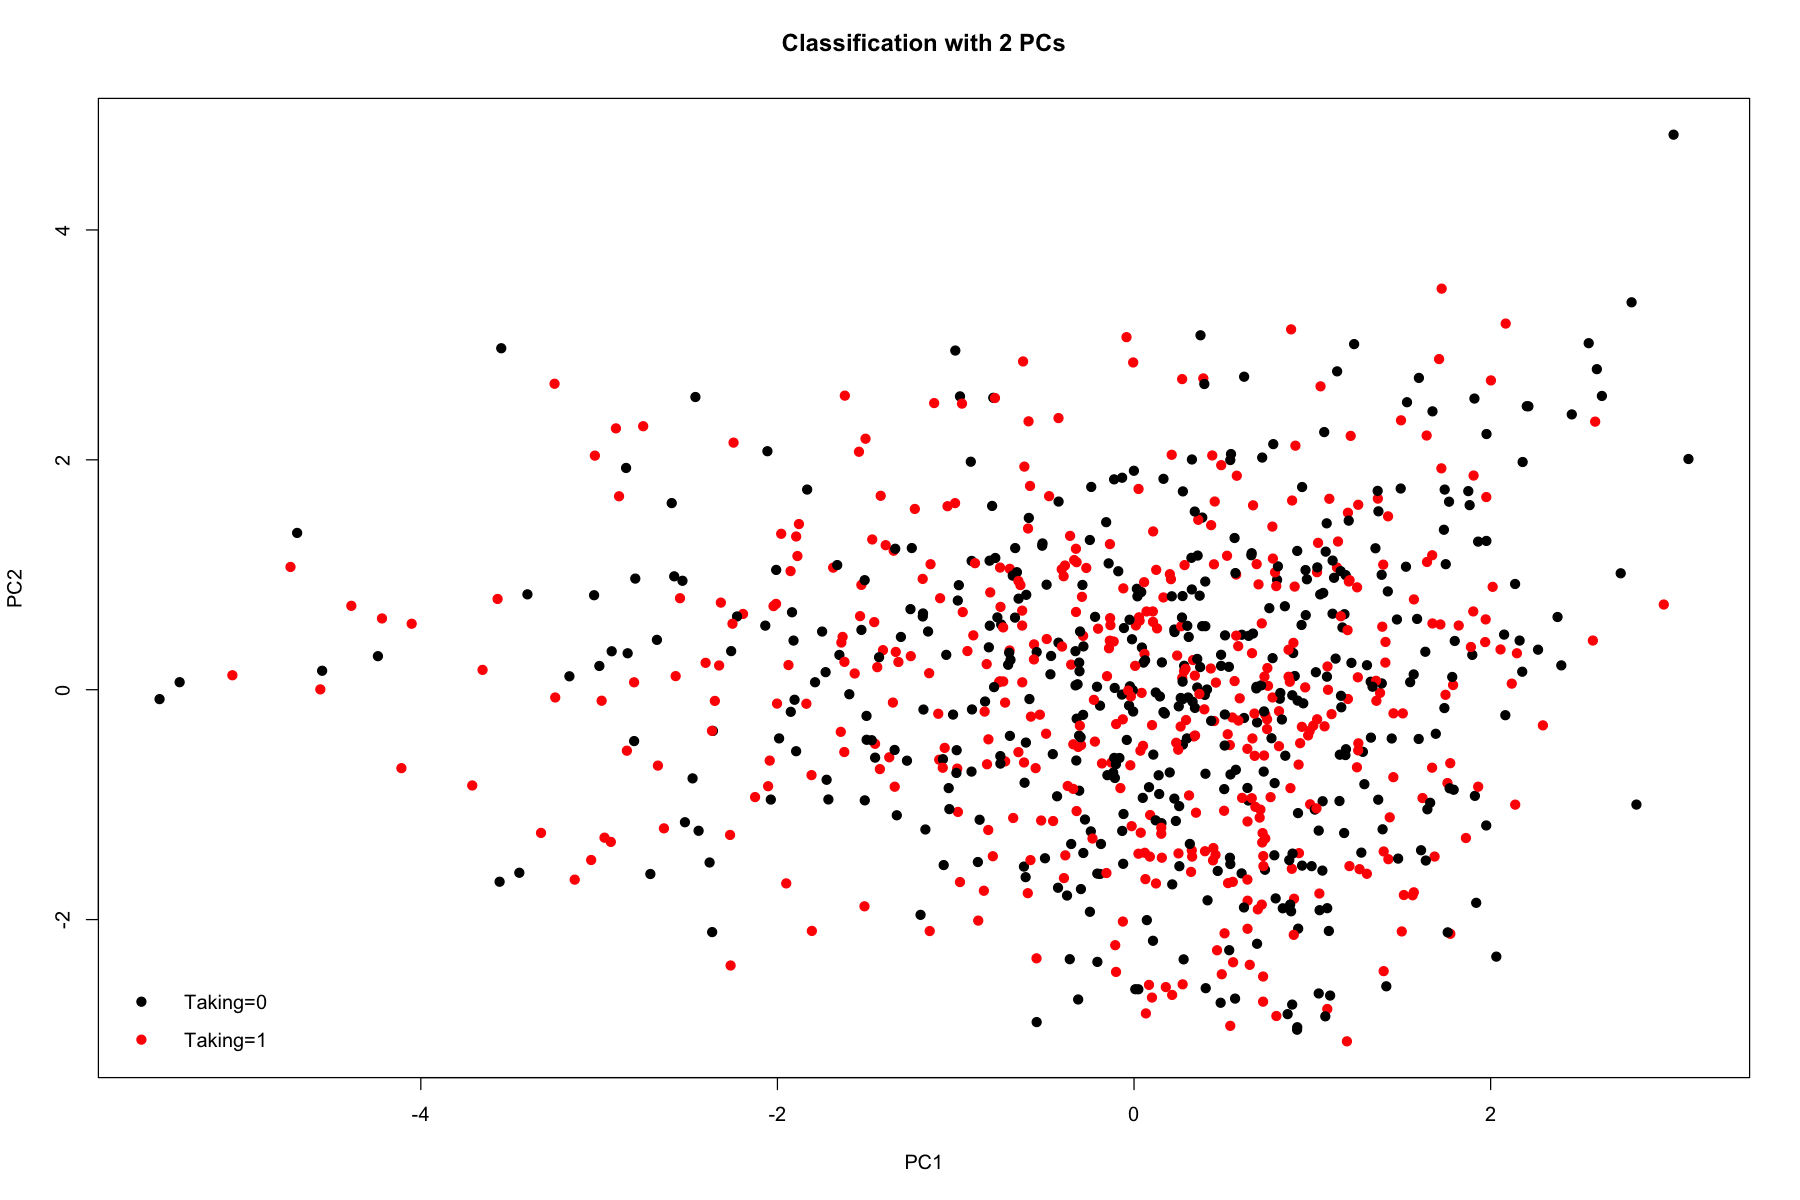

In [105]:
plot(m.pcr$x[,1:3], pch=19,col=c(1,2))
legend('bottomleft', pch=c(19,19), col=c(1,2),
        legend=c('Taking=0', 'Taking=1'), bty='n')
title ("Classification with 2 PCs",line=2)


Let's look how much variance is explained by the 16 components.
While te explained variance for our 2 PCs obtained before is: 24.83%

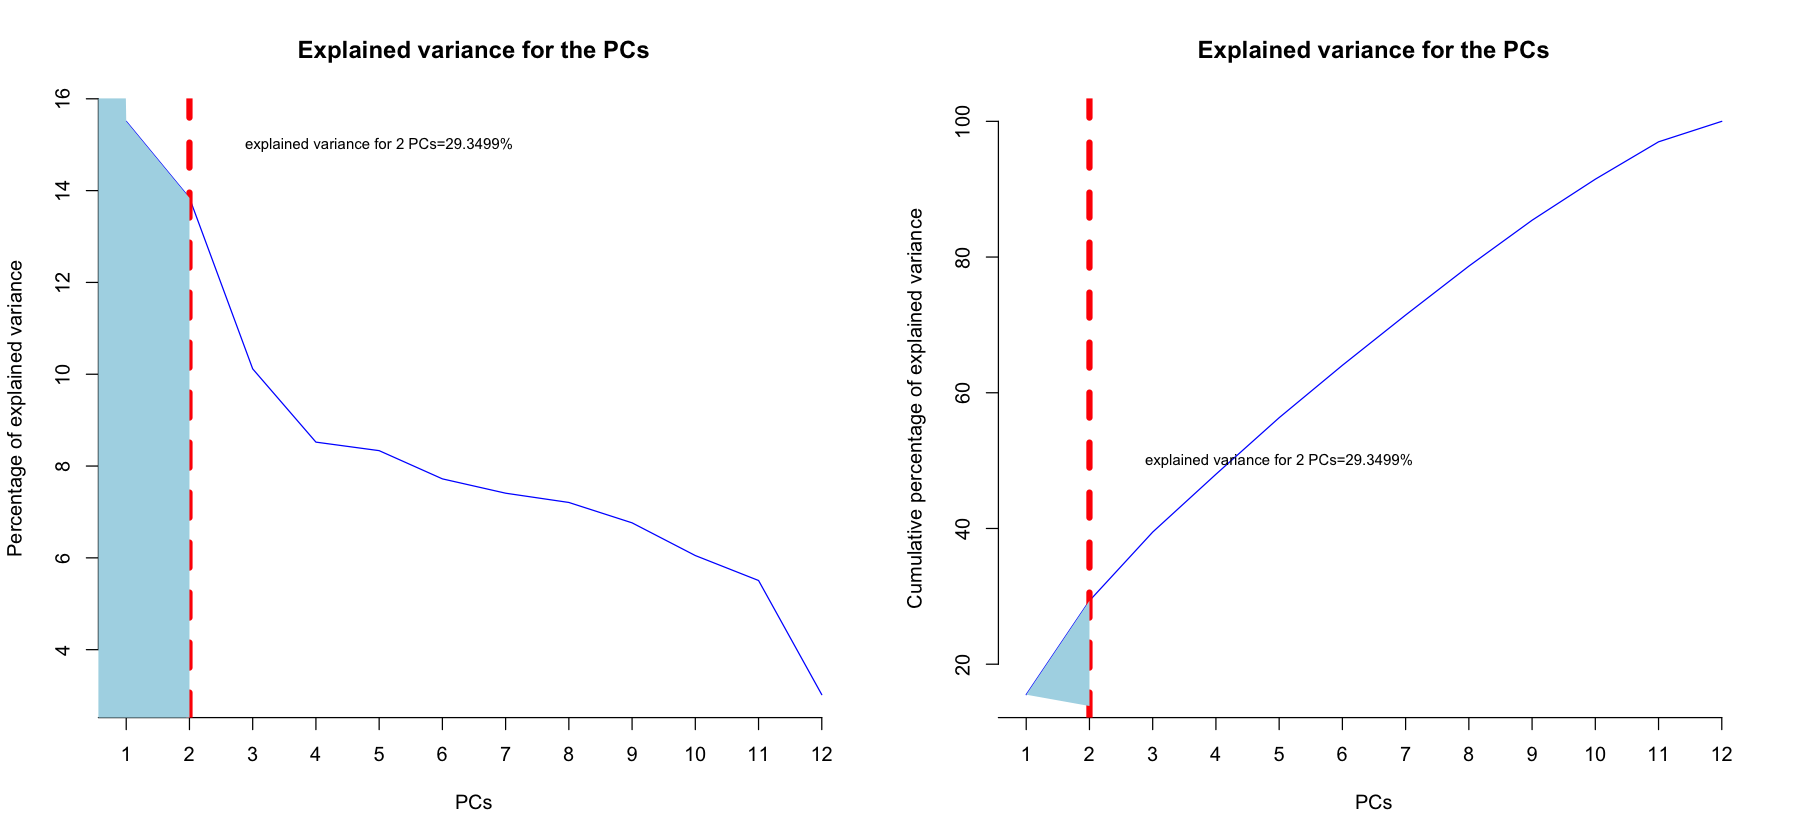

In [44]:
## explained variance
#explvar(m.pcr)
sum=sum(explvar(m.pcr)[1:2])

## plot:
par(mfrow=c(1,2))
options(repr.plot.width = 15, repr.plot.height = 7)
plot(1:12, explvar(m.pcr), ylab='Percentage of explained variance',
        xlab='PCs', type='l', axes=FALSE,col="blue",main="Explained variance for the PCs")
axis(1, at=0:12)
axis(2)
text(x=5, y=15,cex=0.75,paste0("explained variance for 2 PCs=",round(sum,4),"%"))
abline(v=2, col="red",lt=2,lw=5)



x2 = c(0,0,1:2,2)
y2 = c(0,100,explvar(m.pcr)[1:2],0)
polygon(x2,y2, col="lightblue", border=NA)


plot(1:12, cumsum(explvar(m.pcr)), ylab='Cumulative percentage of explained variance',
        xlab='PCs', type='l', axes=FALSE,col="blue",main="Explained variance for the PCs")
axis(1, at=0:12)
axis(2)
text(x=5, y=50,cex=0.75,paste0("explained variance for 2 PCs=",round(sum,4),"%"))
abline(v=2, col="red",lt=2,lw=5)



x2 = c(0,2,1:2,2)
y2 = c(0,sum,explvar(m.pcr)[1:2],sum)
polygon(x2,y2, col="lightblue", border=NA)

Finally we compute the MSE considering 2 components which is equal to: 3.19. This is pretty high meaning that as shown in the clustering plot above the PCA is not satisfactory

In [45]:
pcr.pred=predict(m.pcr,mydata,ncomp=2)
mean((pcr.pred-mydata$cliente)^2)


[1] 1.681288

### CONCLUSION POINT 2

Based the MSE  for the different methods are:
- 0.76 for Ridge
- 0.25 for Lasso
- 3.19 for PCA (for 2 components)

So we can say that  based in MSE  lasso is the best approach since it has got a small MSE and an higher explained deviance (99,9%).
In particular the taking depends, based on lasso, on all the covariates except for In particular mprating4, budget,sequelTRUE, actionTRUE, animatedTRUE, horrorTRUE, actionTRUE:cmngsoon.